In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [97]:
Bayut_df = pd.read_csv('/Users/rahaf/Camp1/Project-5/bayut_properties.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [99]:
Bayut_df.head()

,Page,Price,Type,Beds,Baths,Area,Location
0,2,"680,000",Apartment,6.0,4.0,230 Sq. M.,"Al Rayaan, North Jeddah, Jeddah"
1,2,"450,000",Apartment,4.0,4.0,900 Sq. M.,"Al Safa, North Jeddah, Jeddah"
2,2,"450,000",Apartment,4.0,3.0,136 Sq. M.,"Bryman, North Jeddah, Jeddah"
3,2,"580,000",Apartment,4.0,3.0,134 Sq. M.,"Al Manar, North Jeddah, Jeddah"
4,2,"670,000",Apartment,5.0,3.0,162 Sq. M.,"Al Nuzhah, North Jeddah, Jeddah"


In [100]:
Bayut_df.dtypes

Page          int64
Price        object
Type         object
Beds        float64
Baths       float64
Area         object
Location     object
dtype: object

In [101]:
Bayut_df.shape

(17504, 7)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [103]:
Bayut_df

,Page,Price,Type,Beds,Baths,Area,Location
0,2,"680,000",Apartment,6.0,4.0,230 Sq. M.,"Al Rayaan, North Jeddah, Jeddah"
1,2,"450,000",Apartment,4.0,4.0,900 Sq. M.,"Al Safa, North Jeddah, Jeddah"
2,2,"450,000",Apartment,4.0,3.0,136 Sq. M.,"Bryman, North Jeddah, Jeddah"
3,2,"580,000",Apartment,4.0,3.0,134 Sq. M.,"Al Manar, North Jeddah, Jeddah"
4,2,"670,000",Apartment,5.0,3.0,162 Sq. M.,"Al Nuzhah, North Jeddah, Jeddah"
...,...,...,...,...,...,...,...
17499,701,"1,200,000",Apartment,4.0,4.0,262 Sq. M.,"Al Marwah, North Jeddah, Jeddah"
17500,702,"520,000",Apartment,3.0,2.0,176 Sq. M.,"Al Maealaa, Ahad Rafidah"
17501,702,"630,000",Apartment,6.0,4.0,236 Sq. M.,"Al jameen, Khamis Mushait"
17502,702,"680,000",Villa,5.0,4.0,250 Sq. M.,"Al Muruj, Unayzah"


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [110]:
Bayut_df.drop(columns=['Page'], inplace=True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [112]:
Bayut_df.duplicated().sum()

4933

In [113]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [115]:
miss=Bayut_df[Bayut_df['Area'].isnull()]
miss['Type'].value_counts()

Type
Residential Building    126
Apartment                17
Residential Land         11
Name: count, dtype: int64

In [116]:
#Display number missing values per column
Bayut_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17504 entries, 0 to 17503
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     17504 non-null  object 
 1   Type      17504 non-null  object 
 2   Beds      15323 non-null  float64
 3   Baths     15065 non-null  float64
 4   Area      17350 non-null  object 
 5   Location  17504 non-null  object 
dtypes: float64(2), object(4)
memory usage: 820.6+ KB


In [117]:
Bayut_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17504 entries, 0 to 17503
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     17504 non-null  object 
 1   Type      17504 non-null  object 
 2   Beds      15323 non-null  float64
 3   Baths     15065 non-null  float64
 4   Area      17350 non-null  object 
 5   Location  17504 non-null  object 
dtypes: float64(2), object(4)
memory usage: 820.6+ KB


In [118]:
Bayut_df['Type'].value_counts()

Type
Apartment               8186
Villa                   5222
Residential Land        1714
Floor                   1696
Residential Building     224
Land                     195
Building                 182
Rest House                85
Name: count, dtype: int64

In [119]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [121]:
Bayut_df.dtypes

Price        object
Type         object
Beds        float64
Baths       float64
Area         object
Location     object
dtype: object

In [122]:
# go to clean them 

In [123]:
# check outliers 

In [124]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

In [127]:
indexs=Bayut_df[Bayut_df['Area'].isnull()].index
Bayut_df.drop(indexs,inplace=True)

In [128]:
Bayut_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17350 entries, 0 to 17503
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     17350 non-null  object 
 1   Type      17350 non-null  object 
 2   Beds      15186 non-null  float64
 3   Baths     14911 non-null  float64
 4   Area      17350 non-null  object 
 5   Location  17350 non-null  object 
dtypes: float64(2), object(4)
memory usage: 948.8+ KB


In [129]:
# check columns types 
Bayut_df.dtypes

Price        object
Type         object
Beds        float64
Baths       float64
Area         object
Location     object
dtype: object

In [130]:
Bayut_df["Area"].value_counts()

Area
300 Sq. M.        465
200 Sq. M.        350
450 Sq. M.        297
600 Sq. M.        288
400 Sq. M.        276
                 ... 
198,450 Sq. M.      1
113,750 Sq. M.      1
1,910 Sq. M.        1
1,350 Sq. M.        1
2,476 Sq. M.        1
Name: count, Length: 1075, dtype: int64

In [131]:
Bayut_df["Area"][0].split(" ")[0]

'230'

In [132]:
Bayut_df["Area"]=Bayut_df["Area"].apply(lambda x: x.split(" ")[0])

In [133]:
Bayut_df['Area'] = Bayut_df['Area'].str.replace(',', '').astype(int)

In [134]:
Bayut_df["Area"].value_counts()

Area
300       465
200       350
450       297
600       288
400       276
         ... 
198450      1
113750      1
1910        1
1350        1
2476        1
Name: count, Length: 1075, dtype: int64

In [135]:
Bayut_df.dtypes

Price        object
Type         object
Beds        float64
Baths       float64
Area          int32
Location     object
dtype: object

In [136]:
Bayut_df['Area'].isnull().sum()

0

In [137]:
Bayut_df.loc[(Bayut_df['Type'] == 'Residential Land') | (Bayut_df['Type'] == 'Land'), 'Beds'] = Bayut_df.loc[(Bayut_df['Type'] == 'Residential Land') | (Bayut_df['Type'] == 'Land'), 'Beds'].fillna(0)


In [138]:
Bayut_df[Bayut_df["Beds"].isnull()]["Type"].value_counts()

Type
Building                170
Residential Building     92
Rest House                4
Floor                     1
Name: count, dtype: int64

In [139]:
Bayut_df.loc[(Bayut_df['Type'] == 'Residential Land') | (Bayut_df['Type'] == 'Land'), 'Baths'] = Bayut_df.loc[(Bayut_df['Type'] == 'Residential Land') | (Bayut_df['Type'] == 'Land'), 'Baths'].fillna(0)


In [140]:
Bayut_df[Bayut_df["Baths"].isnull()]["Type"].value_counts()

Type
Building                169
Villa                   154
Apartment               119
Residential Building     98
Rest House                4
Name: count, dtype: int64

In [141]:
df_sorted = Bayut_df.sort_values("Area")
df_sorted

,Price,Type,Beds,Baths,Area,Location
16848,"500,000",Residential Building,NaN,NaN,15,"Manfouhah Al Jadidah, Central Riyadh, Riyadh"
13897,"1,100,000",Apartment,6.0,4.0,44,"Al Rimal, East Riyadh, Riyadh"
2383,"750,000",Apartment,1.0,1.0,44,"Wadi Jalil, Makkah"
737,"1,250,000",Floor,4.0,5.0,44,"Al Rimal, East Riyadh, Riyadh"
1206,"1,250,000",Floor,5.0,5.0,44,"Al Rimal, East Riyadh, Riyadh"
...,...,...,...,...,...,...
6914,"1,000,000",Land,0.0,0.0,113750,Mulayjah
8694,"1,500,760",Residential Land,0.0,0.0,116731,"Shuran, Madina"
6915,"1,200,000",Land,0.0,0.0,198450,Mulayjah
4443,"141,894,115",Land,0.0,0.0,283788,"Al Birriyyah, South Riyadh, Riyadh"


In [142]:
# Define the property types that need filling
property_types_to_fill = ["Building", "Villa", "Apartment", "Residential Building", "Rest House","Floor"]

# Sorting by Area within each property type
df_sorted = Bayut_df[Bayut_df['Type'].isin(property_types_to_fill)].sort_values(by="Area")

# Filling only null values using backward fill
Bayut_df.loc[Bayut_df['Type'].isin(property_types_to_fill), 'Beds'] = (
    df_sorted['Beds'].bfill()
)

Bayut_df.loc[Bayut_df['Type'].isin(property_types_to_fill), 'Baths'] = (
    df_sorted['Baths'].bfill()
)


In [143]:
Bayut_df[Bayut_df["Beds"].isnull()]["Type"].value_counts()

Series([], Name: count, dtype: int64)

### Correcting errors

-------------------

In [145]:
Bayut_df.dtypes

Price        object
Type         object
Beds        float64
Baths       float64
Area          int32
Location     object
dtype: object

In [146]:
Bayut_df["Price"] = Bayut_df["Price"].str.replace(',', '').astype(float)

In [147]:
Bayut_df.dtypes

Price       float64
Type         object
Beds        float64
Baths       float64
Area          int32
Location     object
dtype: object

In [148]:
Bayut_df["Beds"]=Bayut_df["Beds"].astype(int)
Bayut_df["Baths"]=Bayut_df["Baths"].astype(int)

In [149]:
Bayut_df.dtypes

Price       float64
Type         object
Beds          int32
Baths         int32
Area          int32
Location     object
dtype: object

In [150]:
Bayut_df["City"]=Bayut_df["Location"].apply(lambda x: x.split(",")[-1].strip())

In [151]:
Bayut_df["Neighborhood"]=Bayut_df["Location"].apply(lambda x: x.split(",")[0].strip())

In [152]:
Bayut_df.rename(columns={"Area":"Area m2"},inplace=True)

In [153]:
Bayut_df

,Price,Type,Beds,Baths,Area m2,Location,City,Neighborhood
0,680000.0,Apartment,6,4,230,"Al Rayaan, North Jeddah, Jeddah",Jeddah,Al Rayaan
1,450000.0,Apartment,4,4,900,"Al Safa, North Jeddah, Jeddah",Jeddah,Al Safa
2,450000.0,Apartment,4,3,136,"Bryman, North Jeddah, Jeddah",Jeddah,Bryman
3,580000.0,Apartment,4,3,134,"Al Manar, North Jeddah, Jeddah",Jeddah,Al Manar
4,670000.0,Apartment,5,3,162,"Al Nuzhah, North Jeddah, Jeddah",Jeddah,Al Nuzhah
...,...,...,...,...,...,...,...,...
17499,1200000.0,Apartment,4,4,262,"Al Marwah, North Jeddah, Jeddah",Jeddah,Al Marwah
17500,520000.0,Apartment,3,2,176,"Al Maealaa, Ahad Rafidah",Ahad Rafidah,Al Maealaa
17501,630000.0,Apartment,6,4,236,"Al jameen, Khamis Mushait",Khamis Mushait,Al jameen
17502,680000.0,Villa,5,4,250,"Al Muruj, Unayzah",Unayzah,Al Muruj


In [154]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


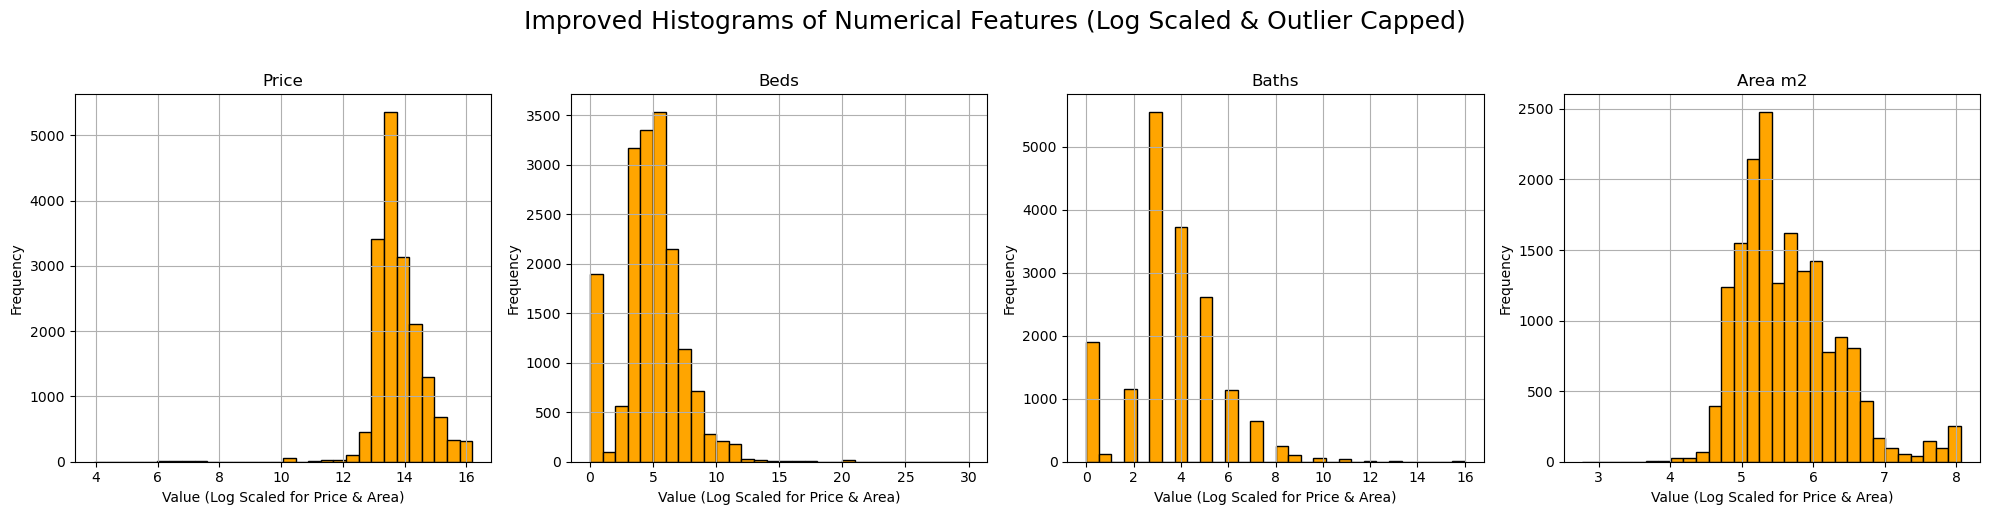

In [157]:
import numpy as np
import matplotlib.pyplot as plt

# Copy DataFrame to avoid modifying the original
Bayut_df_viz = Bayut_df.copy()

# Convert to numeric, handling errors
for col in ['Price', 'Area m2']:  # Adjust column names as needed
    if col in Bayut_df_viz.columns:
        Bayut_df_viz[col] = pd.to_numeric(Bayut_df_viz[col], errors='coerce')
        
        # Remove extreme outliers (capping at 99th percentile)
        upper_limit = Bayut_df_viz[col].quantile(0.99)
        Bayut_df_viz[col] = np.where(Bayut_df_viz[col] > upper_limit, upper_limit, Bayut_df_viz[col])
        
        # Apply log transformation (log(1 + x))
        Bayut_df_viz[col] = np.log1p(Bayut_df_viz[col])

# Select numerical columns
numerical_cols = Bayut_df_viz.select_dtypes(include=['number']).columns

# Define number of rows and columns for subplots
n_cols = 4  # Number of columns per row
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Auto-adjust rows

# Set figure size for better readability
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  # Flatten in case of a single row

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
    Bayut_df_viz[col].hist(ax=axes[i], bins=30, edgecolor='black', color='orange')
    axes[i].set_title(col)
    axes[i].set_xlabel("Value (Log Scaled for Price & Area)")
    axes[i].set_ylabel("Frequency")

# Remove extra subplots (if any)
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

# Set title for the entire figure
fig.suptitle('Improved Histograms of Numerical Features (Log Scaled & Outlier Capped)', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


In [158]:
zscore(Bayut_df['Price'])
#Calculate the z-score for each data point in the 'Price' column
Bayut_df['Price_z_score'] = zscore(Bayut_df['Price'])

#Filter the DataFrame to remove outliers
Bayut_df[(Bayut_df['Price_z_score'] > 3) | (Bayut_df['Price_z_score']< -3)].sort_values(by='Price')

,Price,Type,Beds,Baths,Area m2,Location,City,Neighborhood,Price_z_score
2203,8.281000e+08,Residential Land,0,0,455,"Al Mahdiyah, West Riyadh, Riyadh",Riyadh,Al Mahdiyah,3.438449
672,1.160000e+09,Land,0,0,725,"Al Zumorrud, North Jeddah, Jeddah",Jeddah,Al Zumorrud,4.827373
7800,1.200000e+09,Residential Land,0,0,600,"Al Zohour District, Al Quwaiiyah",Al Quwaiiyah,Al Zohour District,4.994764
8322,1.350210e+09,Land,0,0,450,"Al Mahdiyah, West Riyadh, Riyadh",Riyadh,Al Mahdiyah,5.623357
3537,1.352400e+09,Residential Land,0,0,735,"Al Kair District, North Riyadh, Riyadh",Riyadh,Al Kair District,5.632522
3518,1.402500e+09,Land,0,0,750,Riyadh,Riyadh,Riyadh,5.842179
7901,1.536000e+09,Residential Land,0,0,1280,"Al Faysaliyah, Al Kharj Riyadh Region",Al Kharj Riyadh Region,Al Faysaliyah,6.400845
1864,1.800000e+09,Residential Land,0,0,900,"Al Shifa, South Riyadh, Riyadh",Riyadh,Al Shifa,7.505623
797,2.080000e+09,Land,0,0,800,"Al Lulu, North Jeddah, Jeddah",Jeddah,Al Lulu,8.677357
795,2.080000e+09,Land,0,0,800,"Al Lulu, North Jeddah, Jeddah",Jeddah,Al Lulu,8.677357


In [159]:
Bayut_df.shape

(17350, 9)

In [160]:
# Calculate the Z-score for the 'Price' column
Bayut_df['Price_z_score'] = zscore(Bayut_df['Price'])

# Remove rows where the Z-score is > 3 or < -3
Bayut_df = Bayut_df[(Bayut_df['Price_z_score'] <= 3) & (Bayut_df['Price_z_score'] >= -3)]

# Drop the 'Price_z_score' column if no longer needed
Bayut_df.drop(columns=['Price_z_score'], inplace=True)

C:\Users\rahaf\AppData\Local\Temp\ipykernel_14880\3049962957.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bayut_df.drop(columns=['Price_z_score'], inplace=True)


In [161]:
zscore(Bayut_df['Area m2'])
#Calculate the z-score for each data point in the 'Price' column
Bayut_df['Area_z_score'] = zscore(Bayut_df['Area m2'])

#Filter the DataFrame to remove outliers
Bayut_df[(Bayut_df['Area_z_score'] > 3) | (Bayut_df['Area_z_score']< -3)].sort_values(by='Area m2')

C:\Users\rahaf\AppData\Local\Temp\ipykernel_14880\1802913740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bayut_df['Area_z_score'] = zscore(Bayut_df['Area m2'])


,Price,Type,Beds,Baths,Area m2,Location,City,Neighborhood,Area_z_score
1552,52500000.0,Land,0,0,15000,"Al Rimal, East Riyadh, Riyadh",Riyadh,Al Rimal,3.042460
2848,32120340.0,Residential Land,0,0,16060,"Salam, Al Jubaylah",Al Jubaylah,Salam,3.265097
7747,44145054.0,Residential Land,0,0,16350,"Al Shulah, Dammam",Dammam,Al Shulah,3.326008
7746,44145054.0,Residential Land,0,0,16350,"Al Shulah, Dammam",Dammam,Al Shulah,3.326008
977,1990000.0,Floor,3,2,16843,"Al Arid, North Riyadh, Riyadh",Riyadh,Al Arid,3.429555
770,549000.0,Apartment,3,3,16975,"Umm Hablain Al Gharbia, Jeddah",Jeddah,Umm Hablain Al Gharbia,3.457280
12099,549000.0,Apartment,3,3,16975,"Umm Hablain Al Gharbia, Jeddah",Jeddah,Umm Hablain Al Gharbia,3.457280
11986,629000.0,Apartment,3,2,18490,"Al Rimal, East Riyadh, Riyadh",Riyadh,Al Rimal,3.775484
5435,717000.0,Apartment,3,3,18490,"Al Rimal, East Riyadh, Riyadh",Riyadh,Al Rimal,3.775484
5630,717000.0,Apartment,3,3,18490,"Al Rimal, East Riyadh, Riyadh",Riyadh,Al Rimal,3.775484


In [162]:
# Calculate the Z-score for the 'Area m2' column
Bayut_df['Area_z_score'] = zscore(Bayut_df['Area m2'])

# Remove rows where the Z-score is > 3 or < -3
Bayut_df = Bayut_df[(Bayut_df['Area_z_score'] <= 0.5) & (Bayut_df['Area_z_score'] >= -3)]

# Drop the 'Area_z_score' column if no longer needed
Bayut_df.drop(columns=['Area_z_score'], inplace=True)


C:\Users\rahaf\AppData\Local\Temp\ipykernel_14880\2686723732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bayut_df['Area_z_score'] = zscore(Bayut_df['Area m2'])


In [163]:
# Calculate the Z-score for the 'Price' column
Bayut_df['Price_z_score'] = zscore(Bayut_df['Price'])

# Remove rows where the Z-score is > 3 or < -3
Bayut_df = Bayut_df[(Bayut_df['Price_z_score'] <= 2.5) & (Bayut_df['Price_z_score'] >= -2.5)]

# Drop the 'Price_z_score' column if no longer needed
Bayut_df.drop(columns=['Price_z_score'], inplace=True)

In [164]:
Bayut_df.shape

(17060, 8)

In [165]:
Bayut_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,17060.0,1.359128e+06,1.654429e+06,50.0,625000.0,850000.0,1450000.0,33000000.0
Beds,17060.0,4.423036e+00,2.417717e+00,0.0,3.0,4.0,6.0,30.0
Baths,17060.0,3.642497e+00,1.923147e+00,0.0,3.0,3.0,5.0,16.0
Area m2,17060.0,3.525922e+02,3.222778e+02,15.0,170.0,245.5,412.0,2837.0


In [166]:
Bayut_df['Price'].sort_values()

4781           50.0
12235         400.0
11134         400.0
11689         412.0
1506          460.0
            ...    
16658    25000000.0
16255    30000000.0
16660    31000000.0
1406     32800000.0
14516    33000000.0
Name: Price, Length: 17060, dtype: float64

## 3. Univariate Analysis: 

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

C:\Users\rahaf\AppData\Local\Temp\ipykernel_14880\1537349947.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')


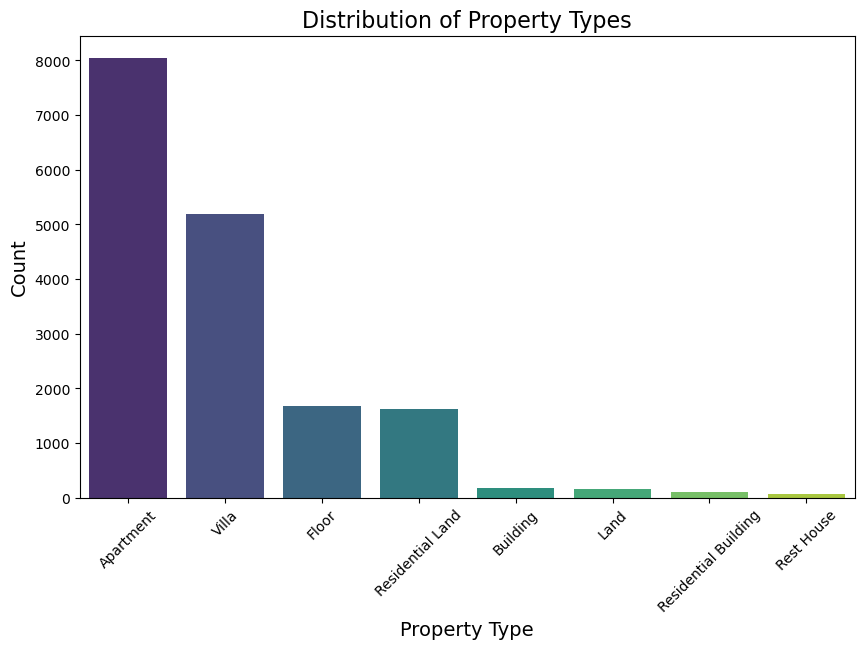

In [170]:
# Count the occurrences of each property type
type_counts = Bayut_df['Type'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')

# Adding labels and title
plt.title('Distribution of Property Types', fontsize=16)
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed for better readability

# Show the plot
plt.show()

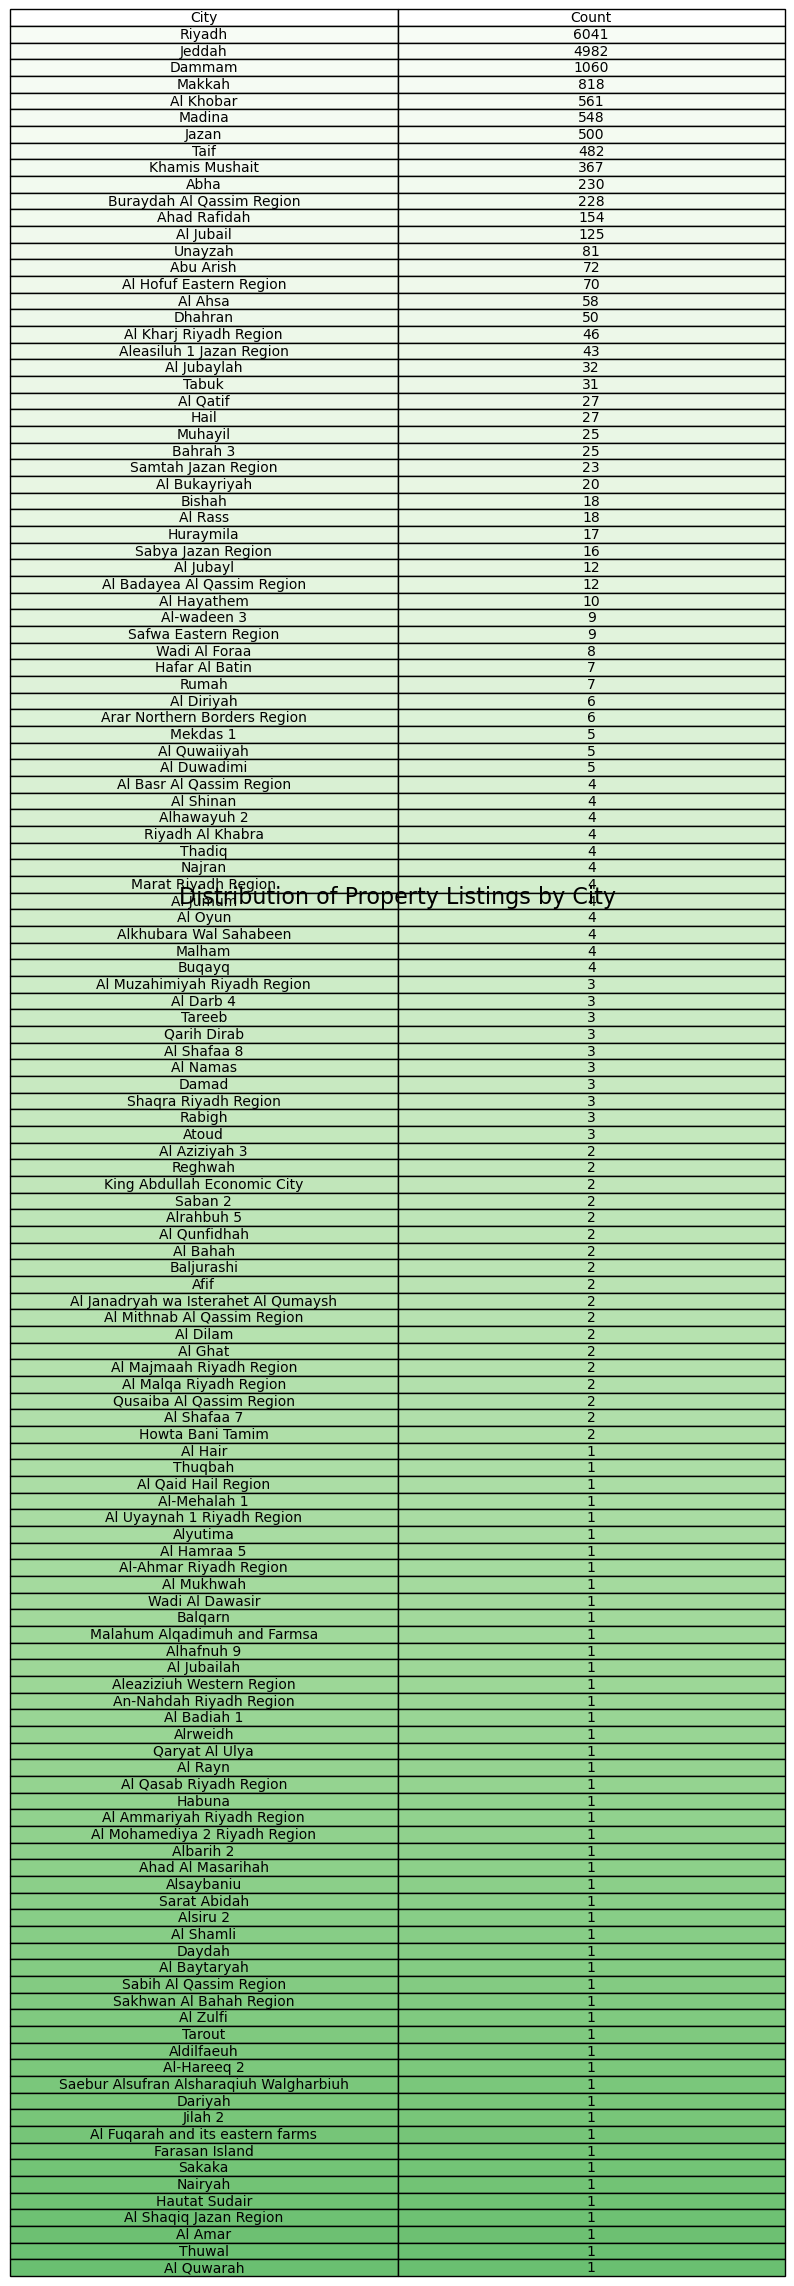

In [171]:


# Assuming df contains a 'City' column
city_counts = Bayut_df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

# Creating a figure and axis to plot the table
fig, ax = plt.subplots(figsize=(10, 6))

# Hiding the axes
ax.axis('off')

# Generate a list of green colors (one for each row)
colors = plt.cm.Greens(range(len(city_counts)))

# Apply the colors to each cell in the table
cell_colours = [[colors[i], colors[i]] for i in range(len(city_counts))]

# Plotting the table with green colors
table = ax.table(cellText=city_counts.values, colLabels=city_counts.columns, cellLoc='center', loc='center', 
                cellColours=cell_colours)

# Adding title to the table
plt.title('Distribution of Property Listings by City', fontsize=16)

# Display the table
plt.show()


In [172]:
Bayut_df['City'].value_counts()

City
Riyadh                    6041
Jeddah                    4982
Dammam                    1060
Makkah                     818
Al Khobar                  561
                          ... 
Hautat Sudair                1
Al Shaqiq Jazan Region       1
Al Amar                      1
Thuwal                       1
Al Quwarah                   1
Name: count, Length: 135, dtype: int64

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

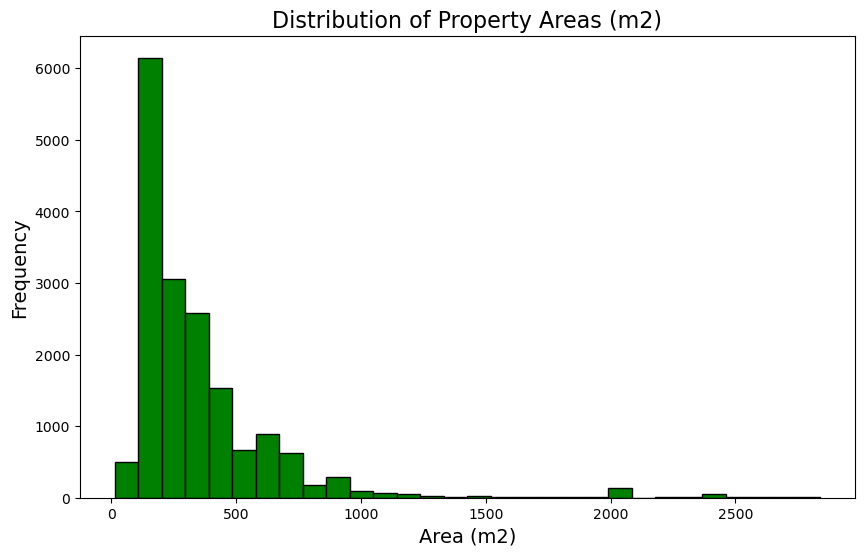

In [233]:
# Plotting the histogram for 'Area m2' column
plt.figure(figsize=(10, 6))
plt.hist(Bayut_df['Area m2'].dropna(), bins=30, color='green', edgecolor='black')

# Adding title and labels
plt.title('Distribution of Property Areas (m2)', fontsize=16)
plt.xlabel('Area (m2)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

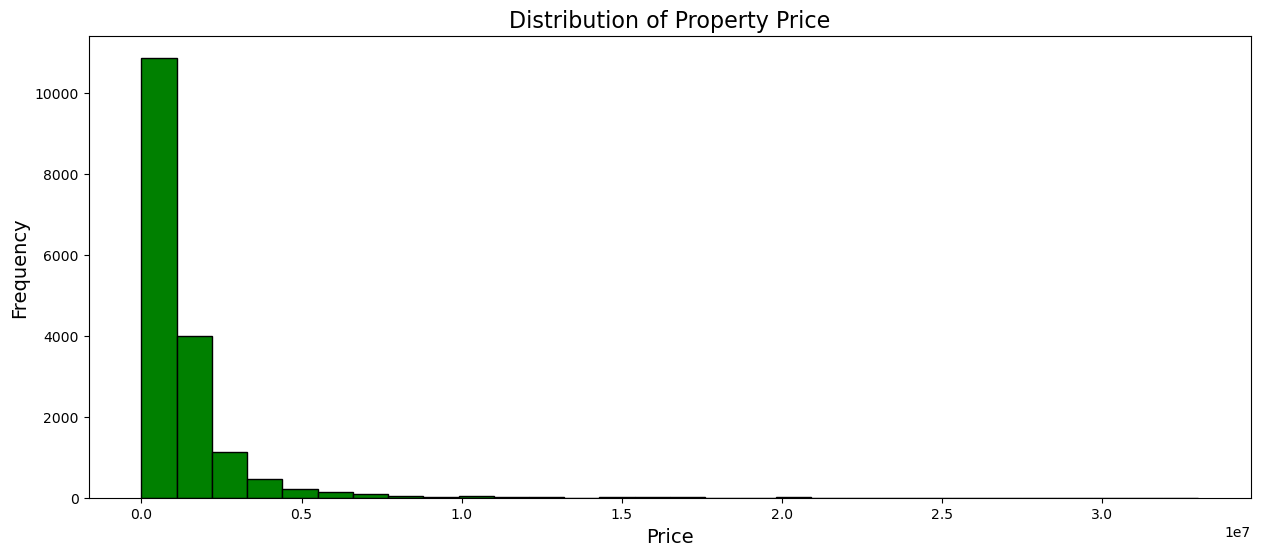

In [235]:
# Plotting the histogram for 'Price' column
plt.figure(figsize=(15, 6))
plt.hist(Bayut_df['Price'].dropna(), bins=30, color='green', edgecolor='black')

# Adding title and labels
plt.title('Distribution of Property Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

In [243]:
# Price would be best presented statistically 

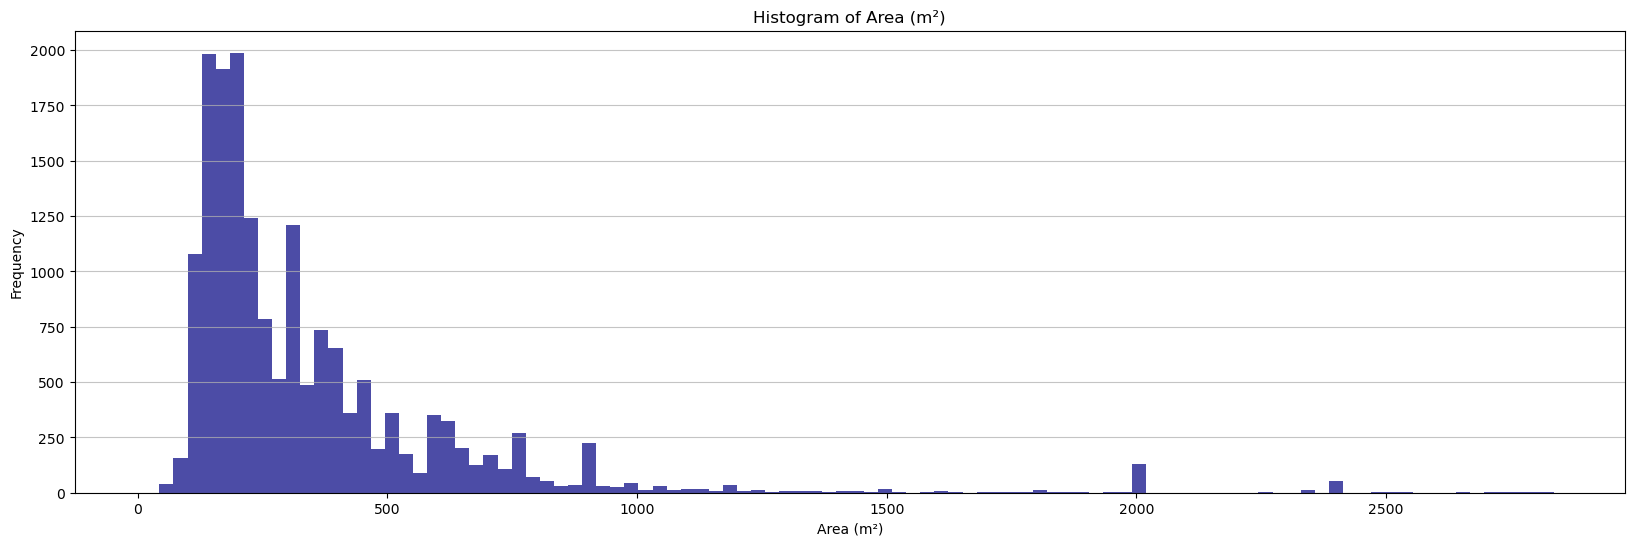

In [239]:
plt.figure(figsize=(20, 6))
plt.hist(Bayut_df['Area m2'], bins=100, color='navy', alpha=0.7)
plt.title('Histogram of Area (m²)')
plt.xlabel('Area (m²)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

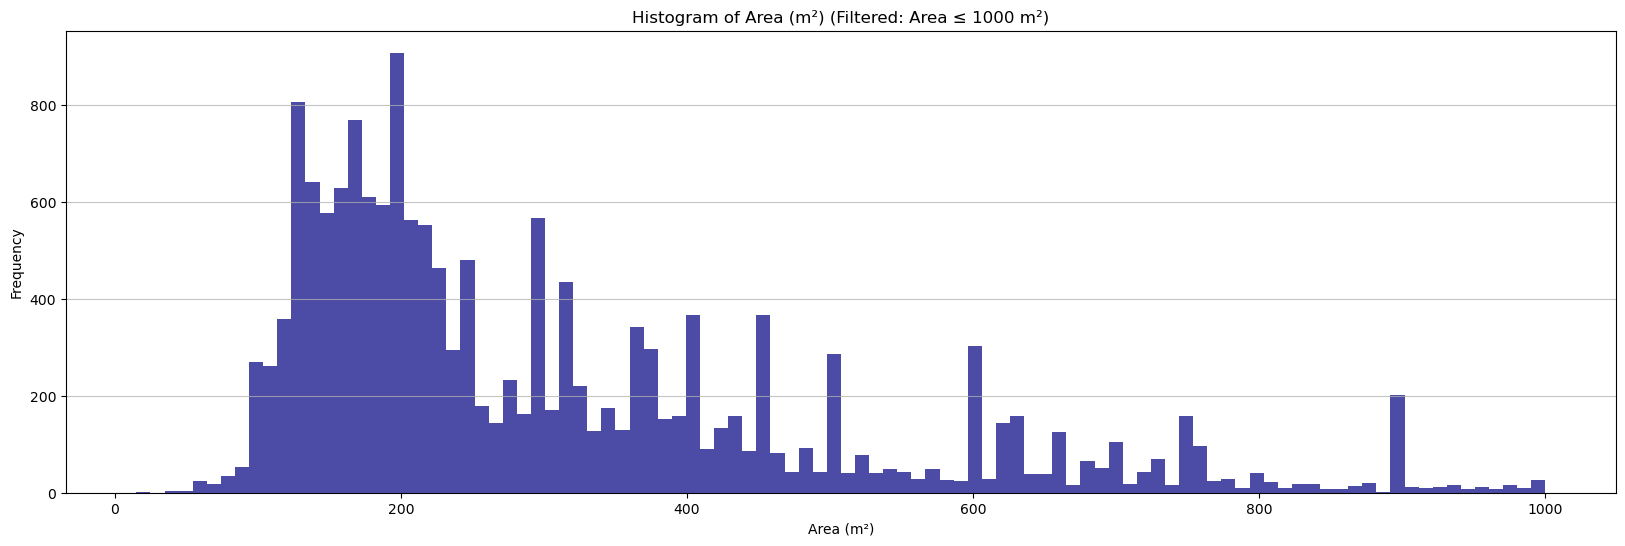

In [241]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only values where 'Area m2' is <= 1000
filtered_Bayut_df = Bayut_df[Bayut_df['Area m2'] <= 1000]

# Plot histogram
plt.figure(figsize=(20, 6))
plt.hist(filtered_Bayut_df['Area m2'], bins=100, color='navy', alpha=0.7)
plt.title('Histogram of Area (m²) (Filtered: Area ≤ 1000 m²)')
plt.xlabel('Area (m²)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

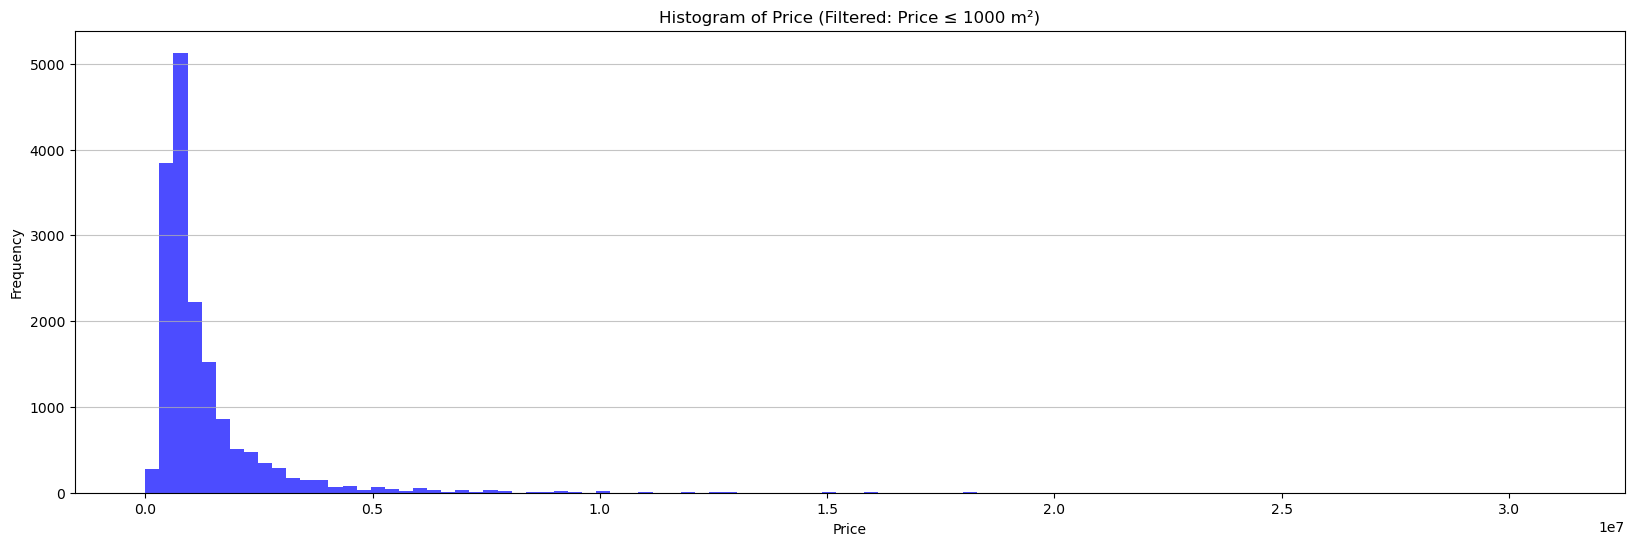

In [660]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only values where 'Area m2' is <= 1000
filtered_Bayut_df_Price = Bayut_df[Bayut_df['Price'] >= 400000] 

# Plot histogram
plt.figure(figsize=(20, 6))
plt.hist(filtered_Bayut_df['Price'], bins=100, color='blue', alpha=0.7)
plt.title('Histogram of Price (Filtered: Price ≤ 1000 m²)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [661]:
Bayut_df[Bayut_df['Price'] >5000000]


,Price,Type,Beds,Baths,Area m2,Location,City,Neighborhood
36,9000000.0,Building,4,3,600,"Al Munsiyah, East Riyadh, Riyadh",Riyadh,Al Munsiyah
47,7500805.0,Land,0,0,902,"Al Rabwah, Central Riyadh, Riyadh",Riyadh,Al Rabwah
85,6500000.0,Villa,7,8,375,"Al Basateen, North Jeddah, Jeddah",Jeddah,Al Basateen
137,7600000.0,Villa,9,7,1000,"Al Hamra, East Riyadh, Riyadh",Riyadh,Al Hamra
151,6500000.0,Villa,7,7,909,"Al Olaya, North Riyadh, Riyadh",Riyadh,Al Olaya
...,...,...,...,...,...,...,...,...
17243,7000000.0,Rest House,4,4,2520,"Al Rimal, East Riyadh, Riyadh",Riyadh,Al Rimal
17272,8900000.0,Land,0,0,1000,"Al Narjis, North Riyadh, Riyadh",Riyadh,Al Narjis
17283,16000000.0,Land,0,0,1000,"Al Nakhil, North Riyadh, Riyadh",Riyadh,Al Nakhil
17284,8900000.0,Land,0,0,1000,"Al Narjis, North Riyadh, Riyadh",Riyadh,Al Narjis


In [662]:
filtered_Bayut_df.shape

(16547, 8)

In [663]:
Bayut_df = filtered_Bayut_df.copy()

In [664]:
Bayut_df.shape

(16547, 8)

In [665]:
df_filtered = Bayut_df[(Bayut_df['Price'] > 5000000) | (Bayut_df['Price'] >= 400000)].copy()


In [666]:
Bayut_df = df_filtered.copy()

In [667]:
Bayut_df.shape

(15983, 8)

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [245]:
Bayut_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,17060.0,1.359128e+06,1.654429e+06,50.0,625000.0,850000.0,1450000.0,33000000.0
Beds,17060.0,4.423036e+00,2.417717e+00,0.0,3.0,4.0,6.0,30.0
Baths,17060.0,3.642497e+00,1.923147e+00,0.0,3.0,3.0,5.0,16.0
Area m2,17060.0,3.525922e+02,3.222778e+02,15.0,170.0,245.5,412.0,2837.0


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

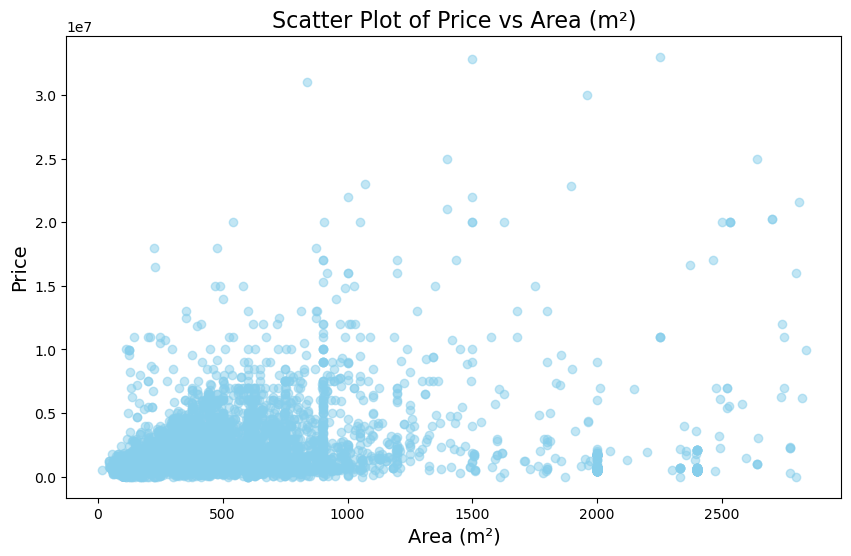

In [247]:
# Scatter plot for Price and Area m2
plt.figure(figsize=(10, 6))
plt.scatter(Bayut_df['Area m2'], Bayut_df['Price'], color='skyblue', alpha=0.5)

# Adding title and labels
plt.title('Scatter Plot of Price vs Area (m²)', fontsize=16)
plt.xlabel('Area (m²)', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Show the plot
plt.show()

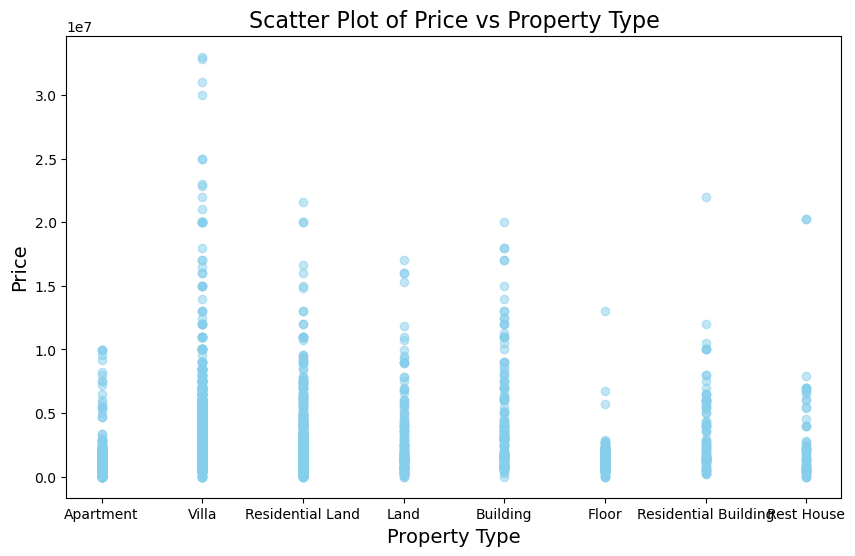

In [249]:
# Scatter plot for 'Type' and 'Price' columns
plt.figure(figsize=(10, 6))
plt.scatter(Bayut_df['Type'], Bayut_df['Price'], color='skyblue', alpha=0.5)

# Adding title and labels
plt.title('Scatter Plot of Price vs Property Type', fontsize=16)
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Show the plot
plt.show()


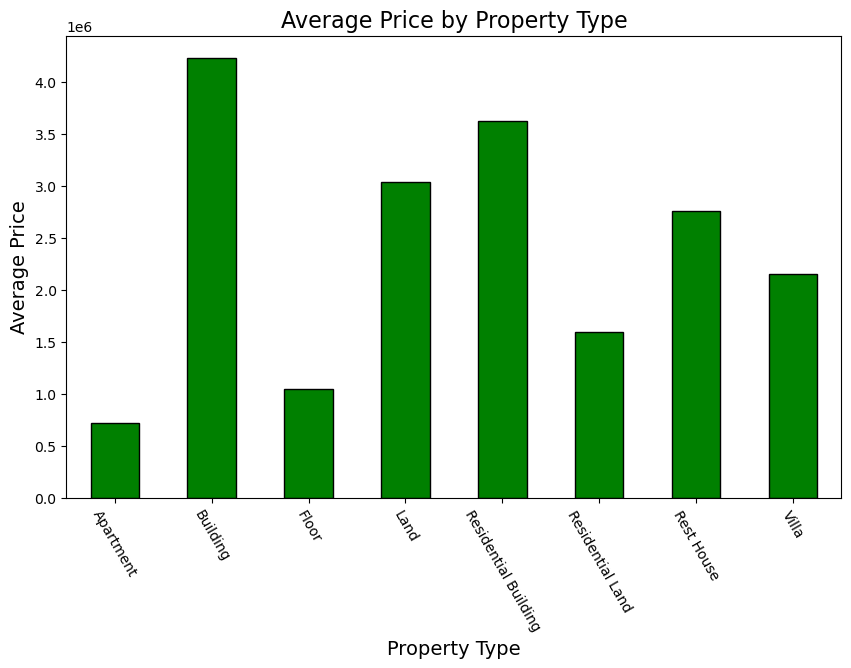

In [252]:
# Calculate the average price for each property type
avg_price_by_type = Bayut_df.groupby('Type')['Price'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
avg_price_by_type.plot(kind='bar', color='green', edgecolor='black')

# Adding title and labels
plt.title('Average Price by Property Type', fontsize=16)
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=300)

# Show the plot
plt.show()

In [668]:
Bayut_df

,Price,Type,Beds,Baths,Area m2,Location,City,Neighborhood
0,680000.0,Apartment,6,4,230,"Al Rayaan, North Jeddah, Jeddah",Jeddah,Al Rayaan
1,450000.0,Apartment,4,4,900,"Al Safa, North Jeddah, Jeddah",Jeddah,Al Safa
2,450000.0,Apartment,4,3,136,"Bryman, North Jeddah, Jeddah",Jeddah,Bryman
3,580000.0,Apartment,4,3,134,"Al Manar, North Jeddah, Jeddah",Jeddah,Al Manar
4,670000.0,Apartment,5,3,162,"Al Nuzhah, North Jeddah, Jeddah",Jeddah,Al Nuzhah
...,...,...,...,...,...,...,...,...
17499,1200000.0,Apartment,4,4,262,"Al Marwah, North Jeddah, Jeddah",Jeddah,Al Marwah
17500,520000.0,Apartment,3,2,176,"Al Maealaa, Ahad Rafidah",Ahad Rafidah,Al Maealaa
17501,630000.0,Apartment,6,4,236,"Al jameen, Khamis Mushait",Khamis Mushait,Al jameen
17502,680000.0,Villa,5,4,250,"Al Muruj, Unayzah",Unayzah,Al Muruj


In [669]:
Bayut_df.drop(columns=['Price_z_score', 'Area_z_score'], errors='ignore', inplace=True)


In [670]:
Bayut_df["City"].value_counts().head(13)

City
Riyadh                       5815
Jeddah                       4533
Dammam                        983
Makkah                        792
Al Khobar                     542
Madina                        519
Taif                          477
Jazan                         467
Khamis Mushait                365
Abha                          227
Buraydah Al Qassim Region     172
Ahad Rafidah                  149
Al Jubail                     125
Name: count, dtype: int64

## Copy the City's

In [671]:
df_Riyadh=Bayut_df[Bayut_df["City"] == "Riyadh"].copy()
df_Makkah=Bayut_df[Bayut_df["City"] == "Makkah"].copy()
df_Jeddah=Bayut_df[Bayut_df["City"] == "Jeddah"].copy()
df_Dammam=Bayut_df[Bayut_df["City"] == "Dammam"].copy()
df_Khobar=Bayut_df[Bayut_df["City"] == "Al Khobar"].copy()
df_AlJubail=Bayut_df[Bayut_df["City"] == "Al Jubail"].copy()
df_Jazan=Bayut_df[Bayut_df["City"] == "Jazan"].copy()
df_KhamisMushait=Bayut_df[Bayut_df["City"] == "Khamis Mushait"].copy()
df_Abha=Bayut_df[Bayut_df["City"] == "Abha"].copy()
df_AhadRafidah=Bayut_df[Bayut_df["City"] == "Ahad Rafidah"].copy()

In [672]:
df_Jeddah.drop(columns=['City'], errors='ignore', inplace=True)
df_Riyadh.drop(columns=['City'], errors='ignore', inplace=True)
df_Makkah.drop(columns=['City'], errors='ignore', inplace=True)
df_Dammam.drop(columns=['City'], errors='ignore', inplace=True)
df_Khobar.drop(columns=['City'], errors='ignore', inplace=True)
df_Jazan.drop(columns=['City'], errors='ignore', inplace=True)
#df_Taif.drop(columns=['City'], errors='ignore', inplace=True)
df_KhamisMushait.drop(columns=['City'], errors='ignore', inplace=True)
df_Abha.drop(columns=['City'], errors='ignore', inplace=True)
df_AhadRafidah.drop(columns=['City'], errors='ignore', inplace=True)
df_AlJubail.drop(columns=['City'], errors='ignore', inplace=True)



In [673]:
df_southern_region = pd.concat([df_Jazan, df_KhamisMushait, df_Abha, df_AhadRafidah], ignore_index=True)
df_western_region = pd.concat([df_Makkah, df_Jeddah], ignore_index=True)
df_eastern_region = pd.concat([df_Dammam, df_Khobar, df_AlJubail], ignore_index=True)

In [674]:
df_Riyadh.shape,df_eastern_region.shape,df_western_region.shape,df_southern_region.shape

((5815, 7), (1650, 7), (5325, 7), (1208, 7))

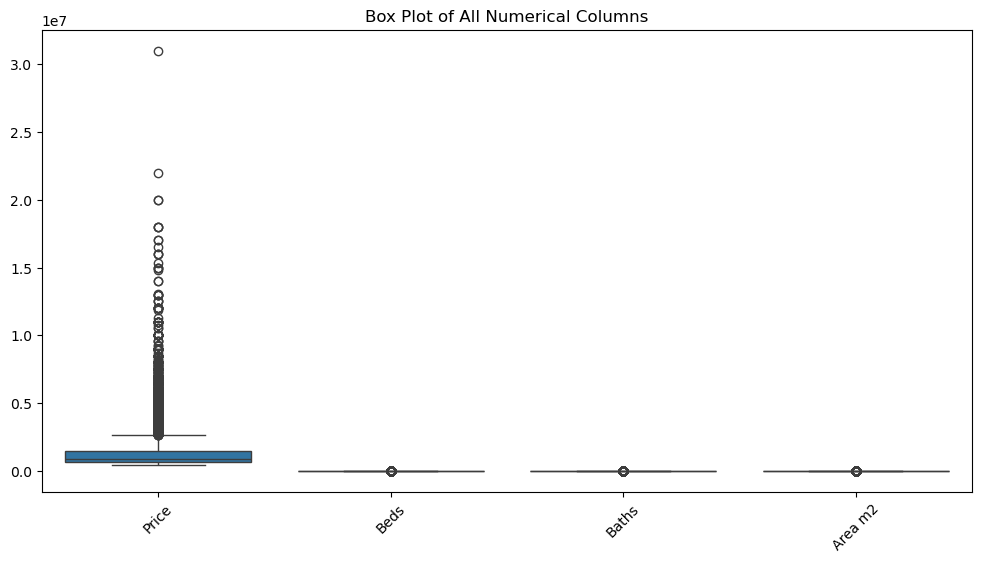

In [675]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=Bayut_df)
plt.xticks(rotation=45)  # Rotate column names if needed
plt.title("Box Plot of All Numerical Columns")
plt.show()

#### 2. Feature engineering

# Riyadh df

In [676]:
encoder = LabelEncoder()
df_Riyadh['Type_encoding'] = encoder.fit_transform(df_Riyadh['Type'])  
df_Riyadh['Location_encoding'] = encoder.fit_transform(df_Riyadh['Location'])  
df_Riyadh['Neighborhood_encoding'] = encoder.fit_transform(df_Riyadh['Neighborhood'])  

# 0 apartment          # 0    7830
# 7 villa              # 7    5135
# 5 restendil land     # 5    1467
# 1 building           # 1     170
# 3 land               # 3     136
# 2 floor              # 2    1662
# 6 rest houes         # 6      53
# 4 restendil building # 4      94

In [677]:
df_Riyadh

,Price,Type,Beds,Baths,Area m2,Location,Neighborhood,Type_encoding,Location_encoding,Neighborhood_encoding
16,690000.0,Apartment,4,5,159,"Al Janadriyah, East Riyadh, Riyadh",Al Janadriyah,0,20,20
21,937500.0,Residential Land,0,0,312,"Al Zahrah, West Riyadh, Riyadh",Al Zahrah,5,98,98
36,9000000.0,Building,4,3,600,"Al Munsiyah, East Riyadh, Riyadh",Al Munsiyah,1,39,39
37,795000.0,Apartment,4,3,158,"Al Rimal, East Riyadh, Riyadh",Al Rimal,0,70,70
38,2100000.0,Villa,5,5,328,"Al Rimal, East Riyadh, Riyadh",Al Rimal,7,70,70
...,...,...,...,...,...,...,...,...,...,...
17459,850000.0,Apartment,4,2,219,"Tuwaiq, West Riyadh, Riyadh",Tuwaiq,0,133,133
17462,730000.0,Apartment,3,3,176,"Al Saadah, East Riyadh, Riyadh",Al Saadah,0,71,71
17469,510000.0,Apartment,3,2,182,"Tuwaiq, West Riyadh, Riyadh",Tuwaiq,0,133,133
17480,800000.0,Floor,3,2,176,"Tuwaiq, West Riyadh, Riyadh",Tuwaiq,2,133,133


## Building the model Kmeans

In [678]:
# Selecting numerical columns for clustering
#X = Bayut_df.drop(columns=['Type','Location','City','Neighborhood'])  

# 0.3/0.4  
F = ['Type_encoding','Price',"Area m2"]
# 0.4/0.59 F = ['Type_encoding','Location_encoding','City_encoding','Neighborhood_encoding']
#F = ['Type_encoding','Location_encoding','City_encoding','Neighborhood_encoding','Price']
X = df_Riyadh[F]

# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



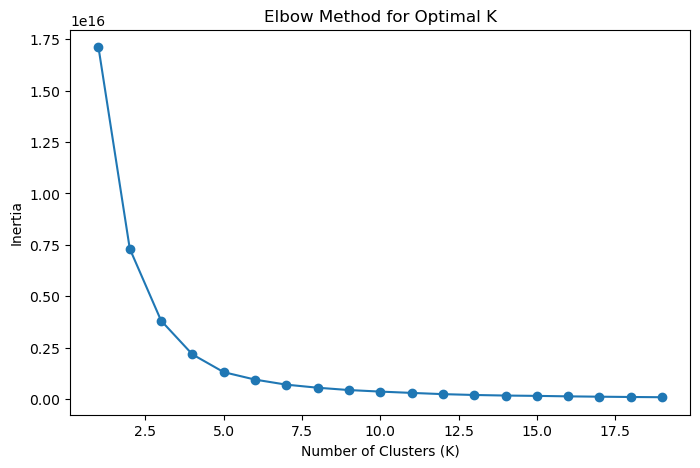

In [679]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [680]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train and Test the Model

In [681]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

## Evaluating the Model 

In [682]:
X.head(2)

,Type_encoding,Price,Area m2
16,0,690000.0,159
21,5,937500.0,312


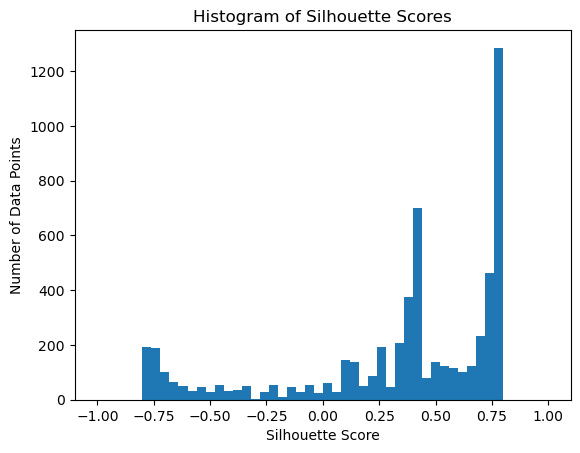

Silhouette average score: 0.3326237915385387


In [683]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate Silhouette scores for each data point
silhouette_scores = silhouette_samples(X, y_pred)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X, y_pred)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

In [684]:
silhouette_scores

array([ 0.77026498, -0.76972993,  0.55691566, ...,  0.70608446,
        0.79036315,  0.78512287])

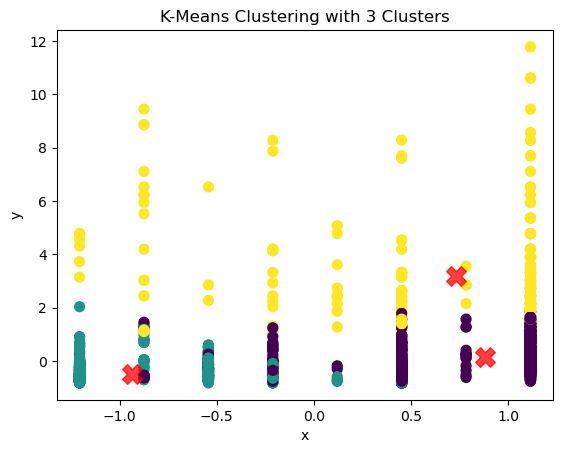

In [685]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [686]:
X['kmeans'] = y_pred

In [687]:
X['kmeans'].value_counts()

kmeans
1    2790
0    2724
2     301
Name: count, dtype: int64

In [688]:
X[X["kmeans"]==2]["Type_encoding"].value_counts()

Type_encoding
7    207
5     35
1     19
3     16
4     10
0      7
6      4
2      3
Name: count, dtype: int64

In [689]:
X[X["kmeans"]==2].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,301.0,5.850498e+00,1.995221e+00,0.0,5.0,7.0,7.0,7.0
Price,301.0,7.270556e+06,3.108875e+06,3349800.0,5400000.0,6450000.0,8000000.0,22000000.0
Area m2,301.0,6.369136e+02,2.131344e+02,123.0,450.0,618.0,840.0,1000.0
kmeans,301.0,2.000000e+00,0.000000e+00,2.0,2.0,2.0,2.0,2.0


In [690]:
X[X["kmeans"]==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,2790.0,0.813262,0.999410,0.0,0.0,0.0,2.0,5.0
Price,2790.0,966218.634409,388742.378360,400000.0,730000.0,860000.0,1160000.0,5300000.0
Area m2,2790.0,215.571326,127.104773,15.0,140.0,174.0,222.0,810.0
kmeans,2790.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [691]:
X[X["kmeans"]==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,2724.0,6.286344e+00,1.489916,0.0,7.0,7.0,7.0,7.0
Price,2724.0,2.076661e+06,982591.326668,400000.0,1350000.0,2000000.0,2600000.0,5500000.0
Area m2,2724.0,3.988322e+02,185.206693,99.0,270.0,362.0,450.0,1000.0
kmeans,2724.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0


In [693]:
X[X["kmeans"]==0] ["Price"].mean(), X[X["kmeans"]==1] ["Price"].mean(), X[X["kmeans"]==2] ["Price"].mean()

(2076661.445301028, 966218.6344086021, 7270556.405315614)

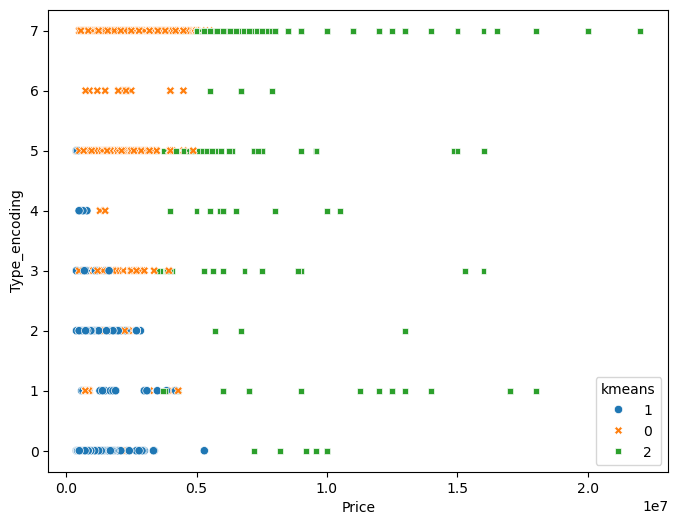

In [600]:

# Convert 'kmeans' to categorical (if it's numerical)
if 'kmeans' in X.columns:
    X['kmeans'] = X['kmeans'].astype(str)

# Create scatter plot with markers
plt.figure(figsize=(8,6))
sns.scatterplot(data=X, x='Price', y='Type_encoding', hue='kmeans', style='kmeans', markers=True)

# Show the plot
plt.show()

In [601]:
#sns.scatterplot(data = X , x = 'Beds', y = 'Baths', hue = 'kmeans')

In [602]:
#sns.scatterplot(data = X , x = 'Baths', y = 'Area m2', hue = 'kmeans')

We See That Cluster 0 shows data with low Prices because the Area m2 is low, representing cheap real estate. This may be caused by different reasons, like which side of Riyadh the real estate is located, the m2 prices, or even the age of the real estate.
Cluster 1 shows data with kind of expected Prices but it also shows that it has low Area m2 with high prices and that may be caused by the location of the real estate and on which side of Riyadh it is.
Cluster 2 data with high Prices and also high Area m2 and based on our data we see that it's mostly land or villas or floors and them having high prices is totally expected based on their types.


In [603]:
X[X['kmeans'] == '0']

,Type_encoding,Price,Area m2,kmeans
21,5,937500.0,312,0
38,7,2100000.0,328,0
39,7,3200000.0,383,0
41,7,2200000.0,450,0
45,5,2670000.0,334,0
...,...,...,...,...
17309,7,2500000.0,201,0
17310,7,1250000.0,201,0
17311,7,2100000.0,360,0
17325,7,570000.0,164,0


## 3D Chart

In [ ]:
import plotly.express as px

# Create a temporary copy for plotting (without modifying X)
X_plot = X.copy()

# Ensure kmeans column exists and convert to integer type first (if needed)
if 'kmeans' in X_plot.columns:
    X_plot['kmeans'] = X_plot['kmeans'].astype(int)  # Ensure it's an integer
    X_plot['kmeans_label'] = X_plot['kmeans'].replace({0: 'Avg Price', 1: 'Low Price', 2: 'High price'}).astype(str)  # Replace & Convert to string

# Create 3D scatter plot with updated labels
fig = px.scatter_3d(X_plot, x='Type_encoding', y='Price', z='Area m2',
                    color='kmeans_label', title="3D Cluster Price of df Riyadh")

# Show the plot
fig.show()


# df_eastern_region df

In [695]:
encoder = LabelEncoder()
df_eastern_region['Type_encoding'] = encoder.fit_transform(df_eastern_region['Type'])  
df_eastern_region['Location_encoding'] = encoder.fit_transform(df_eastern_region['Location'])  
df_eastern_region['Neighborhood_encoding'] = encoder.fit_transform(df_eastern_region['Neighborhood'])  

# 0 apartment          # 0    7830
# 7 villa              # 7    5135
# 5 restendil land     # 5    1467
# 1 building           # 1     170
# 3 land               # 3     136
# 2 floor              # 2    1662
# 6 rest houes         # 6      53
# 4 restendil building # 4      94

In [696]:
df_eastern_region

,Price,Type,Beds,Baths,Area m2,Location,Neighborhood,Type_encoding,Location_encoding,Neighborhood_encoding
0,560000.0,Apartment,7,4,146,"Al Zuhur, Dammam",Al Zuhur,0,84,81
1,610000.0,Apartment,6,4,178,"Al Jamiyin, Dammam",Al Jamiyin,0,34,31
2,770000.0,Apartment,5,4,211,"Al Wahah, Dammam",Al Wahah,0,81,77
3,455000.0,Apartment,4,3,170,"Hajr, Dammam",Hajr,0,93,89
4,820000.0,Apartment,5,3,200,"Al Wahah, Dammam",Al Wahah,0,81,77
...,...,...,...,...,...,...,...,...,...,...
1645,1170000.0,Villa,4,5,375,"Al Aziziyah, Al Jubail",Al Aziziyah,6,11,11
1646,640000.0,Apartment,3,4,200,"Ar Rawdah, Al Jubail",Ar Rawdah,0,85,82
1647,550000.0,Apartment,6,6,211,"Ishbiliyah, Al Jubail",Ishbiliyah,0,96,92
1648,880000.0,Villa,5,5,600,"Al Aziziyah, Al Jubail",Al Aziziyah,6,11,11


## Building the model Kmeans

In [697]:
# Selecting numerical columns for clustering
#X = Bayut_df.drop(columns=['Type','Location','City','Neighborhood'])  

# 0.3/0.4  
F = ['Type_encoding','Price',"Area m2"]
# 0.4/0.59 F = ['Type_encoding','Location_encoding','City_encoding','Neighborhood_encoding']
#F = ['Type_encoding','Location_encoding','City_encoding','Neighborhood_encoding','Price']
X = df_eastern_region[F]

# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



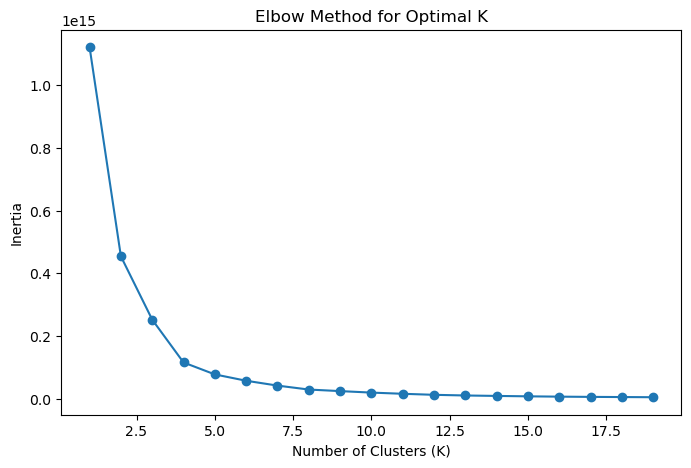

In [698]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [699]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train and Test the Model

In [700]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

## Evaluating the Model 

In [701]:
X.head(2)

,Type_encoding,Price,Area m2
0,0,560000.0,146
1,0,610000.0,178


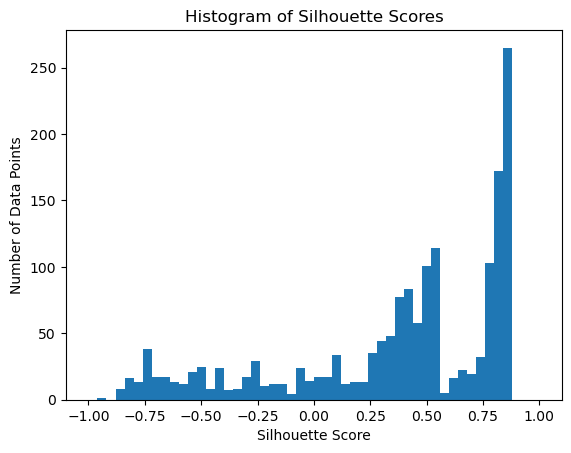

Silhouette average score: 0.3667143698390999


In [702]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate Silhouette scores for each data point
silhouette_scores = silhouette_samples(X, y_pred)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X, y_pred)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

In [703]:
silhouette_scores

array([ 0.85513767,  0.84600645,  0.62351869, ...,  0.85274423,
       -0.31488653, -0.75268107])

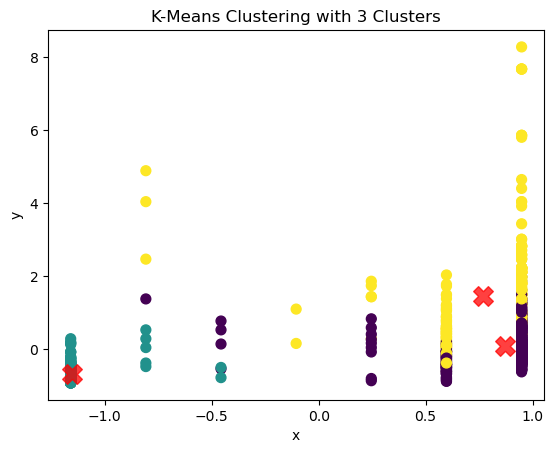

In [704]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [705]:
X['kmeans'] = y_pred

In [706]:
X['kmeans'].value_counts()

kmeans
1    695
0    682
2    273
Name: count, dtype: int64

In [707]:
X[X["kmeans"]==2]["Type_encoding"].value_counts()

Type_encoding
6    154
5    109
4      5
1      3
3      2
Name: count, dtype: int64

In [708]:
X[X["kmeans"]==2].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,273.0,5.487179e+00,7.431183e-01,1.0,5.0,6.0,6.0,6.0
Price,273.0,2.377125e+06,1.178513e+06,648000.0,1545048.0,2300000.0,2900000.0,8000000.0
Area m2,273.0,6.337802e+02,1.697920e+02,250.0,472.0,645.0,750.0,1000.0
kmeans,273.0,2.000000e+00,0.000000e+00,2.0,2.0,2.0,2.0,2.0


In [709]:
X[X["kmeans"]==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,695.0,0.012950,0.136250,0.0,0.0,0.0,0.0,2.0
Price,695.0,611764.028777,141784.099887,400000.0,530000.0,590000.0,674500.0,1600000.0
Area m2,695.0,188.941007,44.898935,73.0,163.0,183.0,211.0,599.0
kmeans,695.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [710]:
X[X["kmeans"]==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,682.0,5.774194e+00,0.548962,1.0,6.0,6.0,6.0,6.0
Price,682.0,1.244579e+06,404904.805954,437100.0,950000.0,1200000.0,1500000.0,2800000.0
Area m2,682.0,3.652243e+02,107.889285,63.0,290.0,360.0,437.0,685.0
kmeans,682.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0


In [711]:
X[X["kmeans"]==0] ["Price"].mean(), X[X["kmeans"]==1] ["Price"].mean(), X[X["kmeans"]==2] ["Price"].mean()

(1244579.0014662757, 611764.0287769784, 2377125.2124542124)

C:\Users\ish3e\AppData\Local\Temp\ipykernel_680\1812565799.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



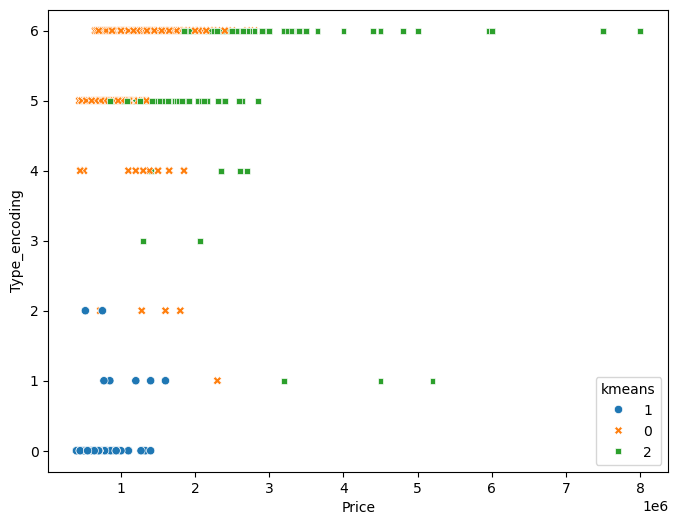

In [ ]:

# Convert 'kmeans' to categorical (if it's numerical)
if 'kmeans' in X.columns:
    X['kmeans'] = X['kmeans'].astype(str)

# Create scatter plot with markers
plt.figure(figsize=(8,6))
sns.scatterplot(data=X, x='Price', y='Type_encoding', hue='kmeans', style='kmeans', markers=True)

# Show the plot
plt.show()

In [ ]:
#sns.scatterplot(data = X , x = 'Beds', y = 'Baths', hue = 'kmeans')

In [ ]:
#sns.scatterplot(data = X , x = 'Baths', y = 'Area m2', hue = 'kmeans')

We See That Cluster 0 shows data with low Prices because the Area m2 is low, representing cheap real estate. This may be caused by different reasons, like which side of Riyadh the real estate is located, the m2 prices, or even the age of the real estate.
Cluster 1 shows data with kind of expected Prices but it also shows that it has low Area m2 with high prices and that may be caused by the location of the real estate and on which side of Riyadh it is.
Cluster 2 data with high Prices and also high Area m2 and based on our data we see that it's mostly land or villas or floors and them having high prices is totally expected based on their types.


## 3d chart

In [ ]:
import plotly.express as px

# Create a temporary copy for plotting (without modifying X)
X_plot = X.copy()

# Ensure kmeans column exists and convert to integer type first (if needed)
if 'kmeans' in X_plot.columns:
    X_plot['kmeans'] = X_plot['kmeans'].astype(int)  # Ensure it's an integer
    X_plot['kmeans_label'] = X_plot['kmeans'].replace({0: 'Avg Price', 1: 'Low Price', 2: 'High price'}).astype(str)  # Replace & Convert to string

# Create 3D scatter plot with updated labels
fig = px.scatter_3d(X_plot, x='Type_encoding', y='Price', z='Area m2',
                    color='kmeans_label', title="3D Cluster of Price of df Eastern_region")

# Show the plot
fig.show()


# df_western_region df

In [770]:
encoder = LabelEncoder()
df_western_region['Type_encoding'] = encoder.fit_transform(df_western_region['Type'])  
df_western_region['Location_encoding'] = encoder.fit_transform(df_western_region['Location'])  
df_western_region['Neighborhood_encoding'] = encoder.fit_transform(df_western_region['Neighborhood'])  

# 0 apartment          # 0    7830
# 7 villa              # 7    5135
# 5 restendil land     # 5    1467
# 1 building           # 1     170
# 3 land               # 3     136
# 2 floor              # 2    1662
# 6 rest houes         # 6      53
# 4 restendil building # 4      94

In [771]:
df_western_region

,Price,Type,Beds,Baths,Area m2,Location,Neighborhood,Type_encoding,Location_encoding,Neighborhood_encoding
0,560000.0,Apartment,2,2,58,"Wadi Jalil, Makkah",Wadi Jalil,0,163,156
1,1354445.0,Residential Land,0,0,934,"As Salamah, Makkah",As Salamah,5,126,120
2,520000.0,Apartment,4,3,127,"Batha Quraysh, Makkah",Batha Quraysh,0,135,128
3,650000.0,Apartment,4,3,184,"Al Mohamdya, Makkah",Al Mohamdya,0,56,52
4,698077.0,Residential Land,0,0,395,"Al Umrah, Makkah",Al Umrah,5,108,102
...,...,...,...,...,...,...,...,...,...,...
5320,840000.0,Apartment,3,3,184,"Al Manar, North Jeddah, Jeddah",Al Manar,0,52,48
5321,610000.0,Apartment,3,2,184,"Um Assalum, South Jeddah, Jeddah",Um Assalum,0,160,153
5322,500000.0,Apartment,4,3,128,"Al Safa, North Jeddah, Jeddah",Al Safa,0,88,82
5323,650000.0,Apartment,3,2,174,"Al Nuzhah, North Jeddah, Jeddah",Al Nuzhah,0,73,68


## Building the model Kmeans

In [772]:
# Selecting numerical columns for clustering
#X = Bayut_df.drop(columns=['Type','Location','City','Neighborhood'])  

# 0.3/0.4  
F = ['Type_encoding','Price',"Area m2"]
# 0.4/0.59 F = ['Type_encoding','Location_encoding','City_encoding','Neighborhood_encoding']
#F = ['Type_encoding','Location_encoding','City_encoding','Neighborhood_encoding','Price']
X = df_western_region[F]

# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



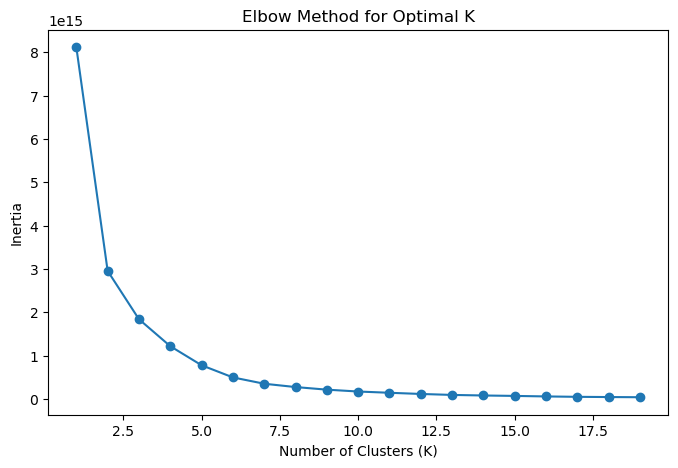

In [773]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [774]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train and Test the Model

In [775]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

## Evaluating the Model 

In [776]:
X.head(2)

,Type_encoding,Price,Area m2
0,0,560000.0,58
1,5,1354445.0,934


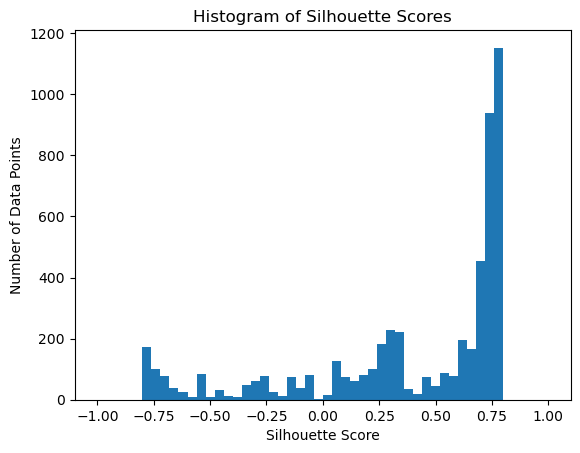

Silhouette average score: 0.39088568135582297


In [777]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate Silhouette scores for each data point
silhouette_scores = silhouette_samples(X, y_pred)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X, y_pred)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

In [778]:
silhouette_scores

array([ 0.75740577,  0.21484949,  0.73827435, ...,  0.7270027 ,
        0.77308156, -0.04568657])

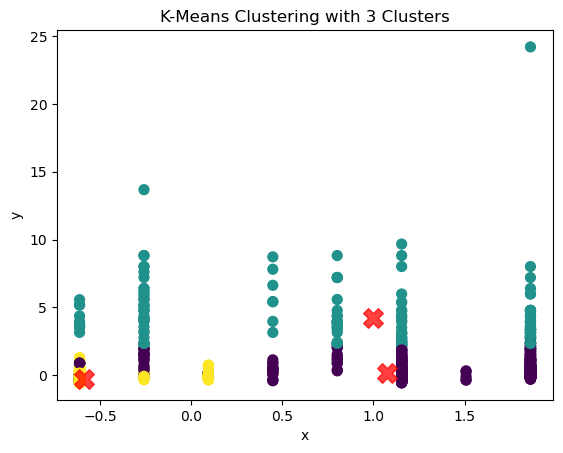

In [779]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [780]:
X['kmeans'] = y_pred

In [781]:
X['kmeans'].value_counts()

kmeans
2    3432
0    1710
1     183
Name: count, dtype: int64

In [782]:
X[X["kmeans"]==2]["Type_encoding"].value_counts()

Type_encoding
0    3320
2     100
1       8
3       4
Name: count, dtype: int64

In [783]:
X[X["kmeans"]==2].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,3432.0,0.064103,0.353975,0.0,0.0,0.0,0.0,3.0
Price,3432.0,720002.868590,245532.403485,400000.0,562250.0,680000.0,790000.0,2700000.0
Area m2,3432.0,167.882576,51.993783,44.0,132.0,161.0,192.0,525.0
kmeans,3432.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


In [784]:
X[X["kmeans"]==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,183.0,4.562842e+00,2.503873e+00,0.0,2.0,5.0,7.0,7.0
Price,183.0,6.308014e+06,2.913600e+06,3700000.0,4500000.0,5500000.0,7000000.0,31000000.0
Area m2,183.0,6.305519e+02,2.094065e+02,112.0,514.5,660.0,772.5,978.0
kmeans,183.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0


In [785]:
X[X["kmeans"]==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,1710.0,4.780117e+00,2.875343,0.0,2.0,7.0,7.0,7.0
Price,1710.0,1.343587e+06,686267.914688,400000.0,899962.0,1200000.0,1600000.0,4000000.0
Area m2,1710.0,4.707123e+02,191.648926,86.0,308.0,414.0,640.0,1000.0
kmeans,1710.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0


In [786]:
X[X["kmeans"]==0] ["Price"].mean(), X[X["kmeans"]==1] ["Price"].mean(), X[X["kmeans"]==2] ["Price"].mean()

(1343586.5081871345, 6308014.087431694, 720002.8685897436)

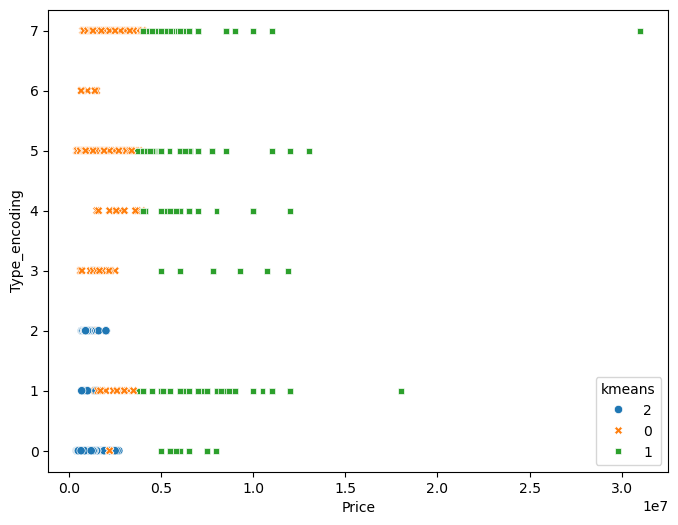

In [787]:

# Convert 'kmeans' to categorical (if it's numerical)
if 'kmeans' in X.columns:
    X['kmeans'] = X['kmeans'].astype(str)

# Create scatter plot with markers
plt.figure(figsize=(8,6))
sns.scatterplot(data=X, x='Price', y='Type_encoding', hue='kmeans', style='kmeans', markers=True)

# Show the plot
plt.show()

In [788]:
#sns.scatterplot(data = X , x = 'Beds', y = 'Baths', hue = 'kmeans')

In [789]:
#sns.scatterplot(data = X , x = 'Baths', y = 'Area m2', hue = 'kmeans')

We See That Cluster 0 shows data with low Prices because the Area m2 is low, representing cheap real estate. This may be caused by different reasons, like which side of Riyadh the real estate is located, the m2 prices, or even the age of the real estate.
Cluster 1 shows data with kind of expected Prices but it also shows that it has low Area m2 with high prices and that may be caused by the location of the real estate and on which side of Riyadh it is.
Cluster 2 data with high Prices and also high Area m2 and based on our data we see that it's mostly land or villas or floors and them having high prices is totally expected based on their types.


## 3D Chart

In [ ]:
import plotly.express as px

# Create a temporary copy for plotting (without modifying X)
X_plot = X.copy()

# Ensure kmeans column exists and convert to integer type first (if needed)
if 'kmeans' in X_plot.columns:
    X_plot['kmeans'] = X_plot['kmeans'].astype(int)  # Ensure it's an integer
    X_plot['kmeans_label'] = X_plot['kmeans'].replace({0: 'Avg Price', 1: 'High Price', 2: 'Low Price'}).astype(str)  # Replace & Convert to string

# Create 3D scatter plot with updated labels
fig = px.scatter_3d(X_plot, x='Type_encoding', y='Price', z='Area m2',
                    color='kmeans_label', title="3D Cluster of Price of df western_region")

# Show the plot
fig.show()


# df_southern_region df

In [792]:
encoder = LabelEncoder()
df_southern_region['Type_encoding'] = encoder.fit_transform(df_southern_region['Type'])  
df_southern_region['Location_encoding'] = encoder.fit_transform(df_southern_region['Location'])  
df_southern_region['Neighborhood_encoding'] = encoder.fit_transform(df_southern_region['Neighborhood'])  

# 0 apartment          # 0    7830
# 7 villa              # 7    5135
# 5 restendil land     # 5    1467
# 1 building           # 1     170
# 3 land               # 3     136
# 2 floor              # 2    1662
# 6 rest houes         # 6      53
# 4 restendil building # 4      94

In [793]:
df_southern_region

,Price,Type,Beds,Baths,Area m2,Location,Neighborhood,Type_encoding,Location_encoding,Neighborhood_encoding
0,560000.0,Apartment,6,3,202,"Al Muhammadiyah 2, Jazan",Al Muhammadiyah 2,0,26,26
1,550000.0,Apartment,3,2,204,"Al Muhammadiyah 2, Jazan",Al Muhammadiyah 2,0,26,26
2,650000.0,Apartment,5,4,212,"Ar Rehab 1, Jazan",Ar Rehab 1,0,70,65
3,500000.0,Apartment,5,3,197,"Al Muhammadiyah 2, Jazan",Al Muhammadiyah 2,0,26,26
4,550000.0,Apartment,2,2,204,"Al Muhammadiyah 2, Jazan",Al Muhammadiyah 2,0,26,26
...,...,...,...,...,...,...,...,...,...,...
1203,465000.0,Apartment,6,4,202,"Al Maealaa, Ahad Rafidah",Al Maealaa,0,19,19
1204,465000.0,Apartment,6,4,202,"Al Maealaa, Ahad Rafidah",Al Maealaa,0,19,19
1205,1000000.0,Villa,4,3,382,"Al Maealaa, Ahad Rafidah",Al Maealaa,7,19,19
1206,1500000.0,Land,0,0,600,"Al Maealaa, Ahad Rafidah",Al Maealaa,3,19,19


## Building the model Kmeans

In [794]:
# Selecting numerical columns for clustering
#X = Bayut_df.drop(columns=['Type','Location','City','Neighborhood'])  

# 0.3/0.4  
F = ['Type_encoding','Price',"Area m2"]
# 0.4/0.59 F = ['Type_encoding','Location_encoding','City_encoding','Neighborhood_encoding']
#F = ['Type_encoding','Location_encoding','City_encoding','Neighborhood_encoding','Price']
X = df_southern_region[F]

# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



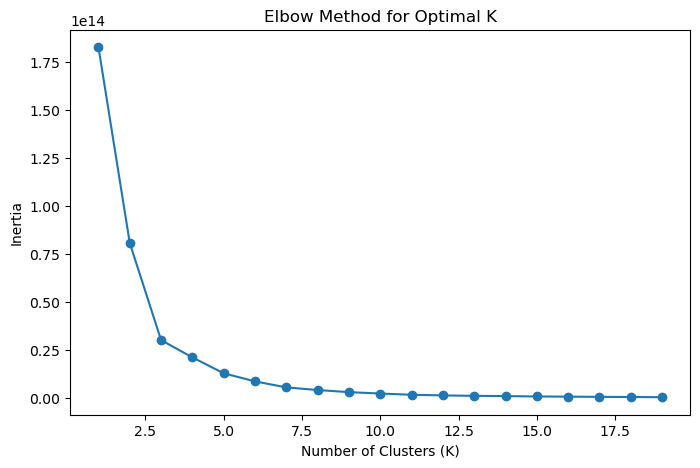

In [795]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [796]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train and Test the Model

In [797]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

## Evaluating the Model 

In [798]:
X.head(2)

,Type_encoding,Price,Area m2
0,0,560000.0,202
1,0,550000.0,204


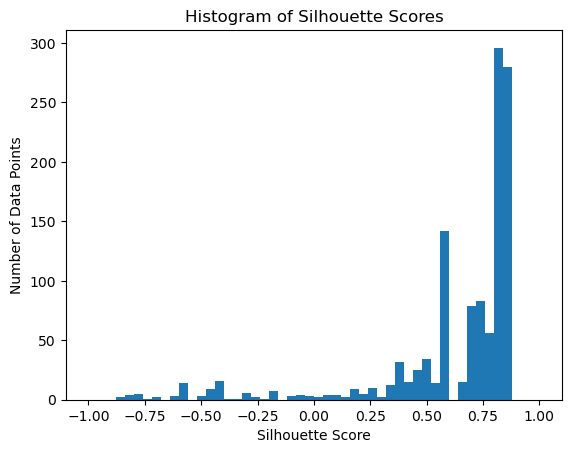

Silhouette average score: 0.630455163207521


In [799]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate Silhouette scores for each data point
silhouette_scores = silhouette_samples(X, y_pred)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X, y_pred)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

In [800]:
silhouette_scores

array([0.83836151, 0.84548136, 0.71759605, ..., 0.50251933, 0.48335673,
       0.84126691])

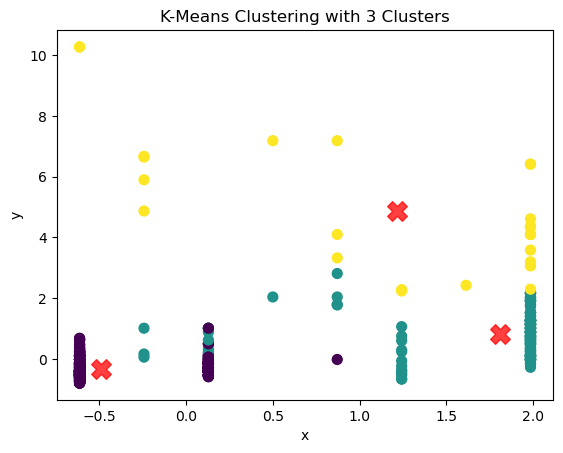

In [801]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [802]:
X['kmeans'] = y_pred

In [803]:
X['kmeans'].value_counts()

kmeans
0    943
1    238
2     27
Name: count, dtype: int64

In [804]:
X[X["kmeans"]==2]["Type_encoding"].value_counts()

Type_encoding
7    14
1     4
4     3
0     2
5     2
3     1
6     1
Name: count, dtype: int64

In [805]:
X[X["kmeans"]==2].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,27.0,4.925926e+00,2.615427,0.0,3.5,7.0,7.0,7.0
Price,27.0,2.598545e+06,849220.061179,1577000.0,1975000.0,2400000.0,3200000.0,4700000.0
Area m2,27.0,5.224074e+02,195.435659,155.0,450.0,498.0,667.0,838.0
kmeans,27.0,2.000000e+00,0.000000,2.0,2.0,2.0,2.0,2.0


In [806]:
X[X["kmeans"]==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,238.0,6.533613e+00,1.388973,0.0,7.0,7.0,7.00,7.0
Price,238.0,1.028729e+06,259342.841747,450000.0,805000.0,1050000.0,1200000.00,1800000.0
Area m2,238.0,3.908025e+02,111.181642,200.0,310.0,368.0,439.75,990.0
kmeans,238.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.00,1.0


In [807]:
X[X["kmeans"]==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Type_encoding,943.0,0.326617,0.745405,0.0,0.0,0.0,0.0,4.0
Price,943.0,573351.007423,101571.823168,400000.0,500000.0,550000.0,630000.0,1100000.0
Area m2,943.0,221.028632,50.449048,112.0,197.0,210.0,227.0,429.0
kmeans,943.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [808]:
X[X["kmeans"]==0] ["Price"].mean(), X[X["kmeans"]==1] ["Price"].mean(), X[X["kmeans"]==2] ["Price"].mean()

(573351.0074231178, 1028729.4033613446, 2598545.3703703703)

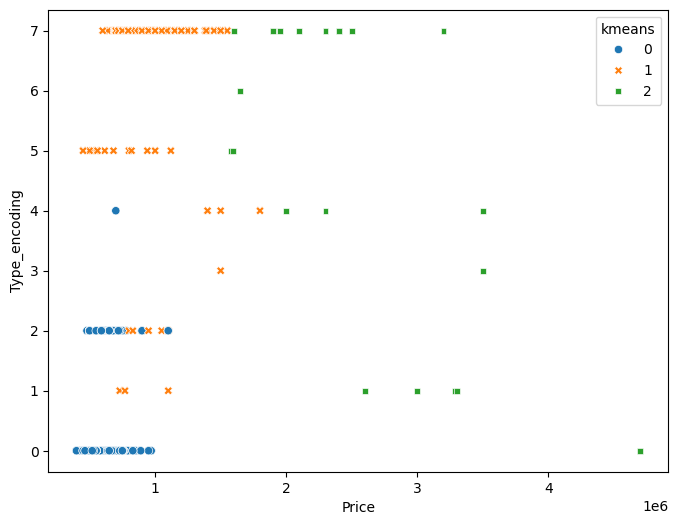

In [809]:

# Convert 'kmeans' to categorical (if it's numerical)
if 'kmeans' in X.columns:
    X['kmeans'] = X['kmeans'].astype(str)

# Create scatter plot with markers
plt.figure(figsize=(8,6))
sns.scatterplot(data=X, x='Price', y='Type_encoding', hue='kmeans', style='kmeans', markers=True)

# Show the plot
plt.show()

In [810]:
#sns.scatterplot(data = X , x = 'Beds', y = 'Baths', hue = 'kmeans')

In [811]:
#sns.scatterplot(data = X , x = 'Baths', y = 'Area m2', hue = 'kmeans')

We See That Cluster 0 shows data with low Prices because the Area m2 is low, representing cheap real estate. This may be caused by different reasons, like which side of Riyadh the real estate is located, the m2 prices, or even the age of the real estate.
Cluster 1 shows data with kind of expected Prices but it also shows that it has low Area m2 with high prices and that may be caused by the location of the real estate and on which side of Riyadh it is.
Cluster 2 data with high Prices and also high Area m2 and based on our data we see that it's mostly land or villas or floors and them having high prices is totally expected based on their types.


In [ ]:
import plotly.express as px

# Create a temporary copy for plotting (without modifying X)
X_plot = X.copy()

# Ensure kmeans column exists and convert to integer type first (if needed)
if 'kmeans' in X_plot.columns:
    X_plot['kmeans'] = X_plot['kmeans'].astype(int)  # Ensure it's an integer
    X_plot['kmeans_label'] = X_plot['kmeans'].replace({0: 'Low Price', 1: 'Avg Price', 2: 'High Price'}).astype(str)  # Replace & Convert to string

# Create 3D scatter plot with updated labels
fig = px.scatter_3d(X_plot, x='Type_encoding', y='Price', z='Area m2',
                    color='kmeans_label', title="3D Cluster of Price of df southern_region")

# Show the plot
fig.show()


## DBSCAN

In [814]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

In [815]:
X

,Type_encoding,Price,Area m2,kmeans
0,0,560000.0,202,0
1,0,550000.0,204,0
2,0,650000.0,212,0
3,0,500000.0,197,0
4,0,550000.0,204,0
...,...,...,...,...
1203,0,465000.0,202,0
1204,0,465000.0,202,0
1205,7,1000000.0,382,1
1206,3,1500000.0,600,1


In [816]:
#X.drop(columns=['kmeans'], inplace=True)

### Buliding the Model

In [817]:
min_samples = 4

In [818]:
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

In [819]:
distances

array([[0.        , 0.        , 0.        , 0.0257284 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.        , 0.13154974],
       [0.        , 1.26874564, 1.34814517, 1.4628909 ],
       [0.        , 0.        , 0.01879282, 0.0257284 ]])

In [820]:
distances[:,min_samples-1]

array([0.0257284 , 0.        , 0.        , ..., 0.13154974, 1.4628909 ,
       0.0257284 ])

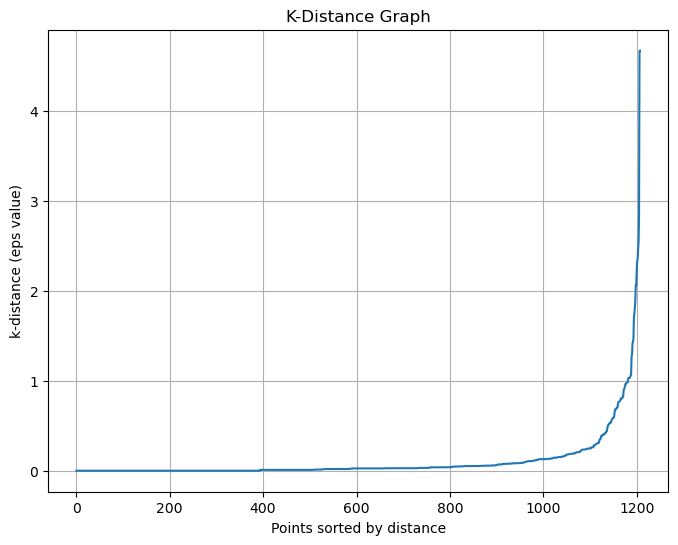

In [821]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

In [822]:
# 4. Apply DBSCAN with chosen eps and min_samples
# Typically, you choose eps at the "elbow" point in this plot, where the slope changes significantly
chosen_eps = 0.4  # This is an example; choose this value based on the plot
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

In [823]:
# Fit the model on the training data

clusters = dbscan.fit_predict(X_scaled)

In [824]:
silhouette_avg = silhouette_score(X, clusters)
silhouette_avg

-0.13649315232576967

In [825]:
X.head(2)

,Type_encoding,Price,Area m2,kmeans
0,0,560000.0,202,0
1,0,550000.0,204,0


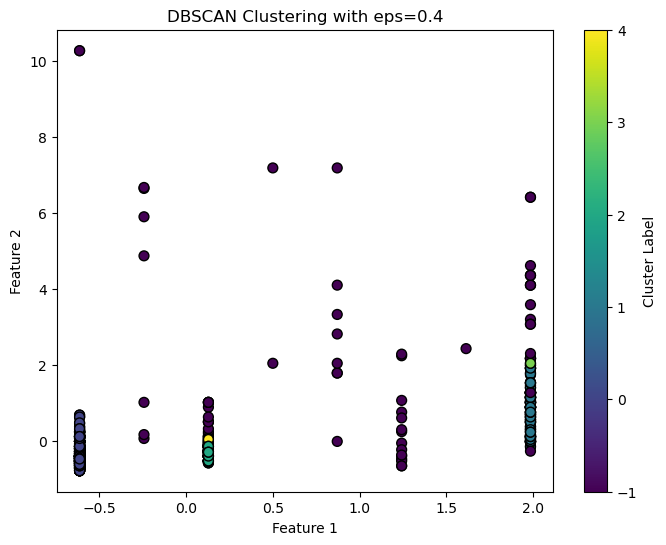

In [826]:
# 5. Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [827]:
X['dbscan'] = clusters

In [828]:
X['dbscan'].value_counts().sort_values(ascending=  False)

dbscan
 0    790
 1    191
 2    141
-1     73
 3      8
 4      5
Name: count, dtype: int64

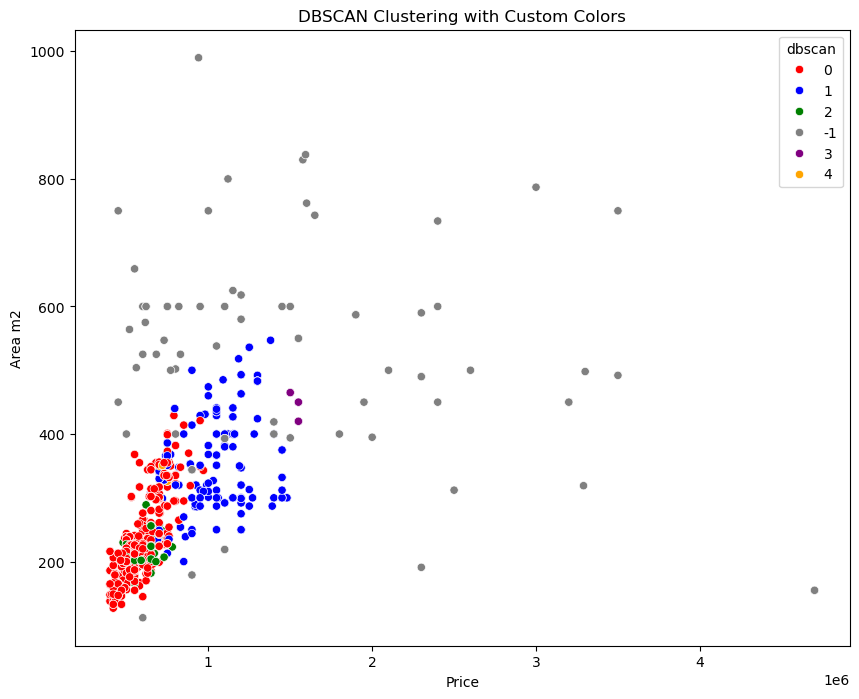

In [829]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors for DBSCAN clusters
custom_palette = {
    "-1": "gray",   # Outliers
     "0": "red",
     "1": "blue",
     "2": "green",
     "3": "purple",
     "4": "orange"
}

# Convert dbscan labels to STRING to match the palette dictionary
X['dbscan'] = X['dbscan'].astype(str)

# Plot scatter plot with custom colors
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X, x='Price', y='Area m2', hue='dbscan', palette=custom_palette)
plt.title("DBSCAN Clustering with Custom Colors")
plt.show()


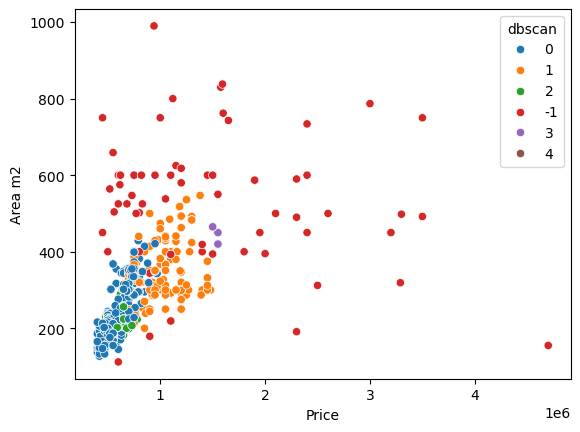

In [830]:
sns.scatterplot(data = X , x = 'Price', y = 'Area m2', hue = 'dbscan')
plt.show()